# The KPMG Bicycle Problem
A classic example of customer segmentaion analysis.
> This is a part of the KPMG Job Simulation Program, it used to be availible [the forage](https://www.theforage.com/) but is archived now.

> This notebook is a summary and updated version of the past three notebooks I've created before which can be visited here:
> - [Task 1](https://www.kaggle.com/code/notcostheta/kpmg-virtual-internship-task1)
> - [Task 2](https://www.kaggle.com/code/notcostheta/kpmg-virtual-internship-task2)
> - [Task 3](https://www.kaggle.com/code/notcostheta/kpmg-virtual-internship-task3)

## Background :

Apparently I’m finally working at KPMG (please hire me) and I just got my first client, it’s a medium-sized bikes and cycling accessories company, Sprocket Central Pty Ltd.

Me along with my Analytics, Information and modelling team are supposed to help them skyrocket their business 📈👌

They provided me with three datasets:

- Customer Demographic
- Customer Addresses
- Transactions data in the past 3 months

But there are issues with their data, of course, it can not be used to build some magical model right away, also my Associate Director suggested that I should optimise the quality of the customer data before deriving any kind of insights for the company growth. 

Which brings us towards our first task !

# Task 1 : Data Quality Assessment
Fix the issues we encounter in all three datasets, and draft an email to the client identifying the data quality issues and ways to mitigate them.

At the end of this task, we would have it cleaned, made it accurate and consistent, and ready to be used for our analysis.


### Data Quality Framework

| Framework   | Description                                                                                      |
|-------------|--------------------------------------------------------------------------------------------------|
| Accuracy    | The closeness between a value to its correct representation of the real-life phenomenon          |
| Completeness| The extent to which data are of sufficient breadth, depth, and scope for the task at hand        |
| Consistency | The extent to which data are uniform in format, use, and meaning across a data collection        |
| Currency    | The freshness of data                                                                           |
| Volatility  | The length of time the data remains valid                                                       |
| Relevancy   | The extent to which data are appropriate for the task at hand                                   |
| Validity    | The extent to which data conform to defined business rules or constraints                       |
| Uniqueness  | The extent to which data are unique within the dataset                                          |


## Importing the data
We will be using pandas libraries to import the data and perform our analysis.
You can also use excel or google sheets and whatever tools you're comfortable with.


In [238]:
# Importing the libraries
import numpy as np
import pandas as pd

# Importing the dataset
xls = pd.ExcelFile(
    "/home/meow/Desktop/internship-speedrun/kpmg/KPMG_VI_New_raw_data_update_final.xlsx"
)

# I'm using black formatting for the code
# Keep note of the naming convention
# We used PascalCase to name all out original datasets

Transactions = pd.read_excel(xls, "Transactions", skiprows=1)
CustomerDemographic = pd.read_excel(xls, "CustomerDemographic", skiprows=1)
CustomerAddress = pd.read_excel(xls, "CustomerAddress", skiprows=1)
NewCustomerList = pd.read_excel(xls, "NewCustomerList", skiprows=1)

## Analyzing the dataframes
We will analyze the dataframes and see what issues we can find in them.
- Shape and Cardinality
- Missing Values
- Duplicates
- Data Types

Solutions and mitigation strategies are available at the end of each section.

### Analysing Transactions Data

#### Shape and Cardinality
- Shape of the data is 20000 rows and 13 columns
- Columns with cardinality 2 should be converted to boolean
- This would be useful for non machine learning approaches

In [239]:
Transactions.head()

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62                  41245.0  
1     2091.47         388.92                  41701.0  
2     1793.43         248.82                  36361.0  
3     1198.46         381.10                  36145.0  
4     1765.30         709.48                  42226.0

In [240]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [241]:
# List unique values of all the columns with ascending order of cardinality
# Cardinality is the number of unique values in a column
# This is a good way to check for categorical columns

for col in Transactions.columns:
    print(f"{col}: {Transactions[col].nunique()}")

print("------------------------------------")

# Print top 7 unique values of all the columns with ascending order of cardinality if less than 7
for col in Transactions.columns:
    if Transactions[col].nunique() < 10:
        print(f"{col}: {Transactions[col].unique()}")

transaction_id: 20000
product_id: 101
customer_id: 3494
transaction_date: 364
online_order: 2
order_status: 2
brand: 6
product_line: 4
product_class: 3
product_size: 3
list_price: 296
standard_cost: 103
product_first_sold_date: 100
------------------------------------
online_order: [ 0.  1. nan]
order_status: ['Approved' 'Cancelled']
brand: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
product_line: ['Standard' 'Road' 'Mountain' 'Touring' nan]
product_class: ['medium' 'low' 'high' nan]
product_size: ['medium' 'large' 'small' nan]


#### Missing Values and Duplicate Rows
- The number of missing values in this dataframe are insignificant and from the same rows, we can drop them.
- There are no duplicate rows

In [242]:
# Function to analyse the missing data


def analyze_null_values(dataframe):
    total_null_values = dataframe.isnull().sum()
    total_values = dataframe.count().sort_values(ascending=True)
    null_values_percentage = (total_null_values / total_values) * 100
    missing_data = pd.concat(
        {
            "Null Values": total_null_values,
            "Percentage of Missing Values": null_values_percentage,
            "Total Values": total_values,
        },
        axis=1,
    )

    missing_data = missing_data.sort_values(
        by="Percentage of Missing Values", ascending=False
    )

    return missing_data


analyze_null_values(Transactions)

Null Values  Percentage of Missing Values  \
online_order                     360                      1.832994   
brand                            197                      0.994799   
product_line                     197                      0.994799   
product_class                    197                      0.994799   
product_size                     197                      0.994799   
standard_cost                    197                      0.994799   
product_first_sold_date          197                      0.994799   
transaction_id                     0                      0.000000   
product_id                         0                      0.000000   
customer_id                        0                      0.000000   
transaction_date                   0                      0.000000   
order_status                       0                      0.000000   
list_price                         0                      0.000000   

                         Total Values  
online_order                    19640  
brand                           19803  
product_line                    19803  
product_class                   19803  
product_size                    19803  
standard_cost                   19803  
product_first_sold_date         19803  
transaction_id                  20000  
product_id                      20000  
customer_id                     20000  
transaction_date                20000  
order_status                    20000  
list_price                      20000

In [243]:
# Show the number of duplicated rows
Transactions.duplicated().sum()

0

#### Date Time Adjustments
- `transaction_date` should be converted to datetime format
- `product_first_sold_date` should be converted to datetime format
- we will later make a new `product_age` column by converting the `product_first_sold_date` to datetime format and subtracting it from the `today_date`

In [244]:
# Define start and end date of the dataset
start_date = pd.to_datetime("2017-01-01")
end_date = pd.to_datetime("2017-12-31")

# Convert transaction_date column to standard datetime format
Transactions["transaction_date"] = pd.to_datetime(Transactions["transaction_date"])

# Convert product_first_sold_date column to standard datetime format
# We need to add the timedelta to the date because the date is stored as a number of days since 1900-01-01
# Assuming the dataset was given to us on 2018-01-01

today_date = pd.Timestamp("2018-01-01")
Transactions["product_first_sold_date"] = pd.to_timedelta(
    Transactions["product_first_sold_date"], unit="D"
) + pd.Timestamp("1900-01-01")

date_difference = pd.Timestamp.today() - today_date
Transactions["product_first_sold_date"] = (
    Transactions["product_first_sold_date"] - date_difference
)

In [245]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

### Fixing the Transactions Data
- We already fixed the date time format earlier
- We will convert the `online_order` and `order_status` columns to object type and map them as True/False
- We have their datatype as object, even though they are boolean, because it'll be helpful for machine learning models
- Don't worry about the `NaN` values, pipelines will take care of them

In [246]:
# Mapping the online_order column to True and False
Transactions["online_order"] = Transactions["online_order"].map({1: True, 0: False})

# Mapping the order_status column to True and False
Transactions["order_status"] = Transactions["order_status"].map(
    {"Approved": True, "Cancelled": False}
)

# Print unique values of online_order and order_status columns
print("Unique values of online_order column:", Transactions["online_order"].unique())
print("Unique values of order_status column:", Transactions["order_status"].unique())

Unique values of online_order column: [False True nan]
Unique values of order_status column: [ True False]


### Analysing Customer Demographic Data

#### Shape and Cardinality
- Shape of the data is 4000 rows and 13 columns
- `owns_car` column should be converted to boolean
- `deceased_indicator` column should be converted to boolean
- `gender` column should be converted to boolean
- `default` column should be dropped as it has no legible data

In [247]:
CustomerDemographic.head(5)

customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases                  DOB  \
0                                   93  1953-10-12 00:00:00   
1                                   81  1980-12-16 00:00:00   
2                                   61  1954-01-20 00:00:00   
3                                   33  1961-10-03 00:00:00   
4                                   56  1977-05-13 00:00:00   

                job_title job_industry_category     wealth_segment  \
0     Executive Secretary                Health      Mass Customer   
1  Administrative Officer    Financial Services      Mass Customer   
2      Recruiting Manager              Property      Mass Customer   
3                     NaN                    IT      Mass Customer   
4           Senior Editor                   NaN  Affluent Customer   

  deceased_indicator                                            default  \
0                  N                                                 "'   
1                  N                       <script>alert('hi')</script>   
2                  N                                2018-02-01 00:00:00   
3                  N  () { _; } >_[$($())] { touch /tmp/blns.shellsh...   
4                  N                                                NIL   

  owns_car  tenure  
0      Yes    11.0  
1      Yes    16.0  
2      Yes    15.0  
3       No     7.0  
4      Yes     8.0

In [248]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [249]:
# List unique values of all the columns with ascending order of cardinality
# Cardinality is the number of unique values in a column
# This is a good way to check for categorical columns

for col in CustomerDemographic.columns:
    print(f"{col}: {CustomerDemographic[col].nunique()}")

print("------------------------------------")

# Print top 7 unique values of all the columns with ascending order of cardinality if less than 7
for col in CustomerDemographic.columns:
    if CustomerDemographic[col].nunique() < 10:
        print(f"{col}: {CustomerDemographic[col].unique()}")

customer_id: 4000
first_name: 3139
last_name: 3725
gender: 6
past_3_years_bike_related_purchases: 100
DOB: 3448
job_title: 195
job_industry_category: 9
wealth_segment: 3
deceased_indicator: 2
default: 90
owns_car: 2
tenure: 22
------------------------------------
gender: ['F' 'Male' 'Female' 'U' 'Femal' 'M']
job_industry_category: ['Health' 'Financial Services' 'Property' 'IT' nan 'Retail' 'Argiculture'
 'Manufacturing' 'Telecommunications' 'Entertainment']
wealth_segment: ['Mass Customer' 'Affluent Customer' 'High Net Worth']
deceased_indicator: ['N' 'Y']
owns_car: ['Yes' 'No']


#### Null Values and Duplicate Rows
- `job_title` has 506 missing values
- `job_industry_category` has 656 missing values
- `last_name` has 125 missing values this whole column can be dropped since it wont be useful for our analysis
- `default` has 3027 missing values this whole column can be dropped since it wont be useful for our analysis
- `tenure` has 87 missing values
- `DOB` has 87 missing values
- There are no duplicate rows

In [250]:
# Call the function to analyze the missing data

analyze_null_values(CustomerDemographic)

Null Values  \
job_industry_category                        656   
job_title                                    506   
default                                      302   
last_name                                    125   
DOB                                           87   
tenure                                        87   
customer_id                                    0   
first_name                                     0   
gender                                         0   
past_3_years_bike_related_purchases            0   
wealth_segment                                 0   
deceased_indicator                             0   
owns_car                                       0   

                                     Percentage of Missing Values  \
job_industry_category                                   19.617225   
job_title                                               14.481969   
default                                                  8.166577   
last_name                                                3.225806   
DOB                                                      2.223358   
tenure                                                   2.223358   
customer_id                                              0.000000   
first_name                                               0.000000   
gender                                                   0.000000   
past_3_years_bike_related_purchases                      0.000000   
wealth_segment                                           0.000000   
deceased_indicator                                       0.000000   
owns_car                                                 0.000000   

                                     Total Values  
job_industry_category                        3344  
job_title                                    3494  
default                                      3698  
last_name                                    3875  
DOB                                          3913  
tenure                                       3913  
customer_id                                  4000  
first_name                                   4000  
gender                                       4000  
past_3_years_bike_related_purchases          4000  
wealth_segment                               4000  
deceased_indicator                           4000  
owns_car                                     4000

In [251]:
# Show the number of duplicated rows
CustomerDemographic.duplicated().sum()

0

#### Date Time Adjustments
- `DOB` should be converted to datetime format
- `tenure` should be converted to integer format


In [252]:
# Convert DOB column to standard datetime format
CustomerDemographic["DOB"] = pd.to_datetime(CustomerDemographic["DOB"])
CustomerDemographic["tenure"] = CustomerDemographic["tenure"].astype("Int64")

### Fixing the Customer Demographic Data
- We already fixed the `DOB` and `tenure` columns earlier
- We will convert the `owns_car` and `deceased_indicator` columns to object type and map them as True/False
- We have their datatype as object, even though they are boolean, because it'll be helpful for machine learning models
- We will map the `gender` column to M and F and make it consistent

In [253]:
# Converting own_car column to True and False
CustomerDemographic["owns_car"] = CustomerDemographic["owns_car"].map(
    {"Yes": True, "No": False}
)

CustomerDemographic["owns_car"] = CustomerDemographic["owns_car"].astype("object")

# Converting deceased_indicator column to True and False
CustomerDemographic["deceased_indicator"] = CustomerDemographic[
    "deceased_indicator"
].map({"Y": True, "N": False})

CustomerDemographic['deceased_indicator'] = CustomerDemographic['deceased_indicator'].astype('object')

# Converting Gender column to M and F and U with np.nan
CustomerDemographic["gender"] = CustomerDemographic["gender"].replace("Female", "F")
CustomerDemographic["gender"] = CustomerDemographic["gender"].replace("Femal", "F")
CustomerDemographic["gender"] = CustomerDemographic["gender"].replace("Male", "M")
CustomerDemographic["gender"] = CustomerDemographic["gender"].replace("U", np.nan)

# Drop the default column
CustomerDemographic.drop(columns="default", inplace=True)

### Analysing Customer Address Data


#### Shape and Cardinality
- Shape of the data is 3999 rows and 6 columns
- `state` column needs to be mapped to State Initials

In [254]:
CustomerAddress.head(5)

customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   
2            4   0 Holy Cross Court      4211              QLD  Australia   
3            5  17979 Del Mar Point      2448  New South Wales  Australia   
4            6     9 Oakridge Court      3216              VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9

In [255]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [256]:
# Cardinailty of the columns
for col in CustomerAddress.columns:
    print(f"{col}: {CustomerAddress[col].nunique()}")
print("------------------------------------")

# Print top 7 unique values of all the columns with ascending order of cardinality if less than 7
for col in CustomerAddress.columns:
    if CustomerAddress[col].nunique() < 10:
        print(f"{col}: {CustomerAddress[col].unique()}")


customer_id: 3999
address: 3996
postcode: 873
state: 5
country: 1
property_valuation: 12
------------------------------------
state: ['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']
country: ['Australia']


#### Missing Values and Duplicate Rows
- no missing values
- no duplicate rows

In [257]:
analyze_null_values(CustomerAddress)

Null Values  Percentage of Missing Values  Total Values
customer_id                   0                           0.0          3999
address                       0                           0.0          3999
postcode                      0                           0.0          3999
state                         0                           0.0          3999
country                       0                           0.0          3999
property_valuation            0                           0.0          3999

In [258]:
# Print the number of duplicated rows
CustomerAddress.duplicated().sum()

0

### Fixing the Customer Address Data
- There's no date time adjustments to be made
- We will map the `state` column to State Initials

In [259]:
# Mapping New South Wales to NSW and Victoria to VIC
CustomerAddress["state"] = CustomerAddress["state"].replace("New South Wales", "NSW")
CustomerAddress["state"] = CustomerAddress["state"].replace("Victoria", "VIC")

### Analysing New Customer List Data


#### Shape and Cardinality
- Shape of the data is 1000 rows and 23 columns
- `owns_car` column should be converted to boolean
- `deceased_indicator` column should be converted to boolean
- `gender` column should be converted to boolean
- `unnamed` columns should be dropped as it has no legible data

In [260]:
# Set max column display to None
pd.set_option("display.max_columns", None)

NewCustomerList.sample(5)

first_name last_name  gender  past_3_years_bike_related_purchases  \
621      Kellyann    Adshad  Female                                   62   
357          Otis       NaN    Male                                   59   
872  Marie-jeanne  Breawood  Female                                   37   
1           Morly    Genery    Male                                   69   
986      Consalve    Ballay    Male                                   41   

            DOB            job_title job_industry_category     wealth_segment  \
621  1940-06-07                  NaN                   NaN      Mass Customer   
357  1971-01-11  Electrical Engineer         Manufacturing  Affluent Customer   
872  1953-10-12  Clinical Specialist                Health     High Net Worth   
1    1970-03-22  Structural Engineer              Property      Mass Customer   
986  1959-09-18      Web Developer I                    IT      Mass Customer   

    deceased_indicator owns_car  tenure             address  postcode state  \
621                  N      Yes      22   29 Tennyson Alley      2161   NSW   
357                  N       No      12   04 Oakridge Plaza      2075   NSW   
872                  N       No       8  6 Prairieview Pass      2770   NSW   
1                    N       No      16   14 Mccormick Park      2113   NSW   
986                  N      Yes       7  72 Village Terrace      2250   NSW   

       country  property_valuation  Unnamed: 16  Unnamed: 17  Unnamed: 18  \
621  Australia                   9         1.05       1.3125     1.640625   
357  Australia                  11         0.68       0.6800     0.850000   
872  Australia                   6         1.07       1.0700     1.070000   
1    Australia                  11         0.89       0.8900     1.112500   
986  Australia                   8         0.63       0.7875     0.787500   

     Unnamed: 19  Unnamed: 20  Rank     Value  
621     1.394531          620   620  0.750000  
357     0.850000          358   358  0.980000  
872     1.070000          871   871  0.541875  
1       0.945625            1     1  1.718750  
986     0.669375          987   987  0.400000

In [261]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [262]:
# Cardinality of the columns
for col in NewCustomerList.columns:
    print(f"{col}: {NewCustomerList[col].nunique()}")
print("------------------------------------")

# Print top 7 unique values of all the columns with ascending order of cardinality if less than 7
for col in NewCustomerList.columns:
    if NewCustomerList[col].nunique() < 10:
        print(f"{col}: {NewCustomerList[col].unique()}")

first_name: 940
last_name: 961
gender: 3
past_3_years_bike_related_purchases: 100
DOB: 961
job_title: 184
job_industry_category: 9
wealth_segment: 3
deceased_indicator: 1
owns_car: 2
tenure: 23
address: 1000
postcode: 522
state: 3
country: 1
property_valuation: 12
Unnamed: 16: 71
Unnamed: 17: 132
Unnamed: 18: 183
Unnamed: 19: 321
Unnamed: 20: 324
Rank: 324
Value: 324
------------------------------------
gender: ['Male' 'Female' 'U']
job_industry_category: ['Manufacturing' 'Property' 'Financial Services' 'Entertainment' 'Retail'
 'IT' 'Telecommunications' 'Health' nan 'Argiculture']
wealth_segment: ['Mass Customer' 'Affluent Customer' 'High Net Worth']
deceased_indicator: ['N']
owns_car: ['Yes' 'No']
state: ['QLD' 'NSW' 'VIC']
country: ['Australia']


#### Missing Values and Duplicate Rows
- `job_title` has 106 missing values
- `job_industry_category` has 165 missing values
- `last_name` has 29 missing values this whole column can be dropped since it wont be useful for our analysis
- there are no duplicate rows

In [263]:
# Call the function to analyze the missing data
analyze_null_values(NewCustomerList)

Null Values  \
job_industry_category                        165   
job_title                                    106   
last_name                                     29   
DOB                                           17   
first_name                                     0   
country                                        0   
Rank                                           0   
Unnamed: 20                                    0   
Unnamed: 19                                    0   
Unnamed: 18                                    0   
Unnamed: 17                                    0   
Unnamed: 16                                    0   
property_valuation                             0   
address                                        0   
state                                          0   
postcode                                       0   
tenure                                         0   
owns_car                                       0   
deceased_indicator                             0   
wealth_segment                                 0   
past_3_years_bike_related_purchases            0   
gender                                         0   
Value                                          0   

                                     Percentage of Missing Values  \
job_industry_category                                   19.760479   
job_title                                               11.856823   
last_name                                                2.986612   
DOB                                                      1.729400   
first_name                                               0.000000   
country                                                  0.000000   
Rank                                                     0.000000   
Unnamed: 20                                              0.000000   
Unnamed: 19                                              0.000000   
Unnamed: 18                                              0.000000   
Unnamed: 17                                              0.000000   
Unnamed: 16                                              0.000000   
property_valuation                                       0.000000   
address                                                  0.000000   
state                                                    0.000000   
postcode                                                 0.000000   
tenure                                                   0.000000   
owns_car                                                 0.000000   
deceased_indicator                                       0.000000   
wealth_segment                                           0.000000   
past_3_years_bike_related_purchases                      0.000000   
gender                                                   0.000000   
Value                                                    0.000000   

                                     Total Values  
job_industry_category                         835  
job_title                                     894  
last_name                                     971  
DOB                                           983  
first_name                                   1000  
country                                      1000  
Rank                                         1000  
Unnamed: 20                                  1000  
Unnamed: 19                                  1000  
Unnamed: 18                                  1000  
Unnamed: 17                                  1000  
Unnamed: 16                                  1000  
property_valuation                           1000  
address                                      1000  
state                                        1000  
postcode                                     1000  
tenure                                       1000  
owns_car                                     1000  
deceased_indicator                           1000  
wealth_segment                               1000  
past_3_years_bike_related_purchases    

In [264]:
# Check for duplicated rows
NewCustomerList.duplicated().sum()

0

#### Date Time Adjustments
- `DOB` should be converted to datetime format

In [265]:
# Convert DOB column to standard datetime format
NewCustomerList["DOB"] = pd.to_datetime(NewCustomerList["DOB"])

### Fixing the New Customer List Data
- We already fixed the `DOB` column earlier
- We will convert the `owns_car` and `deceased_indicator` columns to object type and map them as True/False
- We will map the `gender` column to M and F and make it consistent
- We will drop the `unnamed` columns


In [266]:
# Fixing own_car column
NewCustomerList["owns_car"] = NewCustomerList["owns_car"].replace("Yes", True)
NewCustomerList["owns_car"] = NewCustomerList["owns_car"].replace("No", False)
NewCustomerList["owns_car"] = NewCustomerList["owns_car"].astype("object")

# Fixing deceased_indicator column
NewCustomerList["deceased_indicator"] = NewCustomerList["deceased_indicator"].replace("N", False)
NewCustomerList["deceased_indicator"] = NewCustomerList["deceased_indicator"].astype("object")

# Fixing gender column
NewCustomerList["gender"] = NewCustomerList["gender"].replace("Female", "F")
NewCustomerList["gender"] = NewCustomerList["gender"].replace("Male", "M")
NewCustomerList["gender"] = NewCustomerList["gender"].replace("U", np.nan)

In [267]:
# Dropping all unnamed columns
NewCustomerList.drop(columns="Unnamed: 16", inplace=True)
NewCustomerList.drop(columns="Unnamed: 17", inplace=True)
NewCustomerList.drop(columns="Unnamed: 18", inplace=True)
NewCustomerList.drop(columns="Unnamed: 19", inplace=True)
NewCustomerList.drop(columns="Unnamed: 20", inplace=True)


In [268]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               983 non-null    object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

# Task 2 : Data Insights
Now that we have proposed a solution to the data quality issues, we can now use the data to derive insights.
- We will merge the dataframes to make a master dataframe
- We will find something to do with the postal codes and adresses
- We will do a RFM analysis and make customer clusters
- We will use geopandas to draw customer location heatmaps
- We will use univariate and multivariate analysis to find insights

## Merging the Dataframes
We will merge the three dataframes to make a master dataframe, we will use the `customer_id` column as the key.


### Merging Strategy
- Looks like `customer_id` is the common column in all three traingin dataframes
- NewCustomerList has no `customer_id` column since they are new customers
- We will use `customer_id` as the primary key to merge the dataframes
- Since we don't want to deal with duplicate columns, we will use inner join

In [269]:
# Display all the common columns in all the datasets
common_columns = list(
    set(Transactions.columns)
    & set(CustomerDemographic.columns)
    & set(CustomerAddress.columns)
)
print(common_columns)

['customer_id']


In [270]:
# Inner join all the datasets
_ = pd.merge(
    Transactions,
    CustomerDemographic,
    how="inner",
    left_on="customer_id",
    right_on="customer_id",
)

MasterDataset = pd.merge(
    _,
    CustomerAddress,
    how="inner",
    left_on="customer_id",
    right_on="customer_id",
)

MasterDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  int64         
 1   product_id                           19968 non-null  int64         
 2   customer_id                          19968 non-null  int64         
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19609 non-null  object        
 5   order_status                         19968 non-null  bool          
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

## Important Note

`Int64` and `int64` are different datatypes.

I recieved a peculiar error with the same code when I tried to use Int64 instead of int64, turns out some seaborne functions can not handle non nullable data types.

'Int64': 'Int64' is a nullable integer data type introduced in pandas 0.24.0. It allows for the representation of integer data with the presence of NaN values. This means that if you have missing values (NaN) in your integer column, pandas will use the 'Int64' data type to indicate that it supports nullable integers.

'int64': 'int64' (lowercase 'i') is the regular integer data type (non-nullable) provided by NumPy, which is the underlying library used by pandas. In 'int64' data type, there are no NaN values allowed, and the data is treated as non-nullable integers.

So we will convert all the `int64` columns to `Int64` to avoid any errors.

In [271]:
# Check if the datatype is int64 if it is, convert it to Int64

for col in MasterDataset.columns:
    if MasterDataset[col].dtype == "int64":
        MasterDataset[col] = MasterDataset[col].astype("Int64")
        
MasterDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19968 entries, 0 to 19967
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19968 non-null  Int64         
 1   product_id                           19968 non-null  Int64         
 2   customer_id                          19968 non-null  Int64         
 3   transaction_date                     19968 non-null  datetime64[ns]
 4   online_order                         19609 non-null  object        
 5   order_status                         19968 non-null  bool          
 6   brand                                19773 non-null  object        
 7   product_line                         19773 non-null  object        
 8   product_class                        19773 non-null  object        
 9   product_size                         19773 non-null  object        
 10  list_price

## Building the Postcoded Dataframe
- We would have used [Australian Bureau of Statistics](https://www.abs.gov.au/statistics) to get the postal codes and their corresponding states, but they don't have a free API
- So we will use a [CSV file](https://www.matthewproctor.com/australian_postcodes) instead
- Made a `Postcoded` dataframe with the postal codes and fixed the state column, it is now consistent with the postal codes
- We will later use this with Geopandas to make a heatmap of the customer locations

In [272]:
# Import the Australian Postcodes dataset
Postcodes = pd.read_csv(
    "/home/meow/Desktop/internship-speedrun/kpmg/australian_postcodes.csv"
)

# Replace 0 with np.nan
Postcodes.replace(0, np.nan, inplace=True)

In [273]:
# We only need the postcode, longitude and latitude columns
# We also need the state column which will make the state consistent with postcodes in the MasterDataset

Postcodes = Postcodes[["postcode", "lat", "long", "state"]]

In [274]:
# Drop all the rows with missing values
Postcodes.dropna(inplace=True)

# Drop all the duplicate rows
Postcodes.drop_duplicates(inplace=True)

# Drop all the non unique postcode rows
Postcodes.drop_duplicates(subset="postcode", inplace=True)

Postcodes.head()

postcode        lat        long state
0       200 -35.277700  149.119000   ACT
2       800 -12.458684  130.836680    NT
4       801 -12.458684  130.836680    NT
6       804 -12.428017  130.873315    NT
7       810 -12.381806  130.866242    NT

In [275]:
Postcoded = MasterDataset.copy()

Postcoded = pd.merge(
    Postcoded,
    Postcodes,
    how="inner",
    left_on="postcode",
    right_on="postcode",
)

In [276]:
print(Postcoded.shape)
print(MasterDataset.shape)

(19968, 32)
(19968, 29)


In [277]:
# Since state_y is a feature of postcode it is more reliable than state_x
# So we will drop state_x

Postcoded.drop(columns="state_x", inplace=True)
Postcoded.rename(columns={"state_y": "state"}, inplace=True)

In [278]:
Postcoded.sample(5)

transaction_id  product_id  customer_id transaction_date online_order  \
7566            14776          74          369       2017-09-09         True   
2576            13950          66         1746       2017-03-07         True   
6913             2867          16         1554       2017-08-18        False   
14573            9854          35          229       2017-08-18         True   
3248             8371          63         3401       2017-05-26         True   

       order_status           brand product_line product_class product_size  \
7566           True        WeareA2B     Standard        medium       medium   
2576           True           Solex     Standard        medium       medium   
6913           True  Norco Bicycles     Standard          high        small   
14573          True  Giant Bicycles     Standard        medium       medium   
3248           True           Solex     Standard        medium       medium   

       list_price  standard_cost    product_first_sold_date first_name  \
7566      1228.07         400.91 1997-09-21 02:14:37.994342       Alic   
2576      1163.89         589.27 2010-07-22 02:14:37.994342        Kev   
6913      1661.92        1479.11 1986-10-24 02:14:37.994342       Land   
14573     1403.50         954.82 2010-11-27 02:14:37.994342     Vaughn   
3248      1483.20          99.59 1986-10-15 02:14:37.994342    Cristie   

      last_name gender  past_3_years_bike_related_purchases        DOB  \
7566    Trenear      M                                   19 1991-08-24   
2576        NaN      M                                   58 1962-01-05   
6913     Aarons      M                                   83 1994-08-12   
14573    Lambis      M                                   30 1966-03-06   
3248        NaN      F                                   92 1993-07-28   

               job_title job_industry_category     wealth_segment  \
7566             Actuary    Financial Services      Mass Customer   
2576            Operator                    IT     High Net Worth   
6913   Assistant Manager                Retail  Affluent Customer   
14573                NaN              Property     High Net Worth   
3248      Tax Accountant    Telecommunications      Mass Customer   

      deceased_indicator owns_car  tenure                address  postcode  \
7566               False     True       9   6085 Petterle Circle      3130   
2576               False    False       6  6 Forest Dale Parkway      4017   
6913               False    False       3       277 Maple Circle      2768   
14573              False    False      19     93 Westend Terrace      2116   
3248               False     True       4      6851 Orin Parkway      2142   

         country  property_valuation        lat        long state  
7566   Australia                  10 -37.818050  145.149653   VIC  
2576   Australia                   4 -27.318074  153.047339   QLD  
6913   Australia                   8 -33.737863  150.922732   NSW  
14573  Australia                  10 -33.814368  151.036941   NSW  
3248   Australia                  10 -33.832747  151.015196   NSW

## Feature Engineering
For deriving insights, we will make a few new columns in our master dataframe.
These will be :
- `customer_age` : Age of the customer (only keep customers with age less than 100)
- `customer_age_group` : Age group of the customer
- `product_age` : Age of the product
- `profit` : Profit of the transaction
- `recency` : Recency of the transaction
- `frequency` : Frequency of the transaction
- `transaction_month` : Month of the transaction
- `transaction_week` : Week of the transaction
- `transaction_day` : Day of the transaction

In [279]:
# Calculate the age of the customers
Postcoded["customer_age"] = (end_date - Postcoded["DOB"]).dt.days // 365.25
Postcoded["customer_age"] = Postcoded["customer_age"].astype("Int64")

# Keeping only the values between 14 and 100
Postcoded = Postcoded[
    (Postcoded["customer_age"] >= 14) & (Postcoded["customer_age"] <= 100)
]

Postcoded.customer_age.describe()

count      19513.0
mean     39.855122
std       12.59898
min           15.0
25%           30.0
50%           40.0
75%           49.0
max           86.0
Name: customer_age, dtype: Float64

In [280]:
# Calculate the age of the products
Postcoded["product_age"] = (end_date - Postcoded["product_first_sold_date"]).dt.days // 365.25

In [281]:
# Calculate age group
age_group = pd.cut(
    Postcoded["customer_age"],
    bins=[14, 30, 50, 70, 90],
    labels=["14-30", "31-50", "51-70", "71-90"],
)
Postcoded["age_group"] = age_group

In [282]:
# Calculate profit
Postcoded["profit"] = Postcoded["list_price"] - Postcoded["standard_cost"]

# Calculate recency
Postcoded["recency"] = (today_date - Postcoded["transaction_date"]).dt.days.astype("Int64")

# Calculate frequency

Postcoded["frequency"] = Postcoded.groupby("customer_id")["customer_id"].transform(
    "count"
)

In [283]:
# Calculate the Transaction Day, Week , Month
Postcoded['transaction_day'] = Postcoded['transaction_date'].dt.strftime('%A')
Postcoded['transaction_week'] = Postcoded['transaction_date'].dt.strftime('%W')
Postcoded['transaction_month'] = Postcoded['transaction_date'].dt.strftime('%B')

In [284]:
Postcoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19513 entries, 0 to 19967
Data columns (total 40 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19513 non-null  Int64         
 1   product_id                           19513 non-null  Int64         
 2   customer_id                          19513 non-null  Int64         
 3   transaction_date                     19513 non-null  datetime64[ns]
 4   online_order                         19162 non-null  object        
 5   order_status                         19513 non-null  bool          
 6   brand                                19327 non-null  object        
 7   product_line                         19327 non-null  object        
 8   product_class                        19327 non-null  object        
 9   product_size                         19327 non-null  object        
 10  list_price     

## Univariate Analysis
> We will use seaborne to make some plots and find insights as done [here](https://www.kaggle.com/code/abdallahellawah/kpmg-internship-module-2).

> If we find any outliers, we will take a deeper look to understand why they exist and how they affect the distribution.

Since this is a Univariate analysis we have no use for the null values, so we will drop them.
We will make a copy of the `Postcoded` dataframe as `MasterClean` and drop the null values from it.

### Highlights from the Univariate Analysis
- From the Price Distribution, it's clear that it is a normally distributed data with no outliers, and a mean of **1110** USD
- The Profit Distribution is Right Skewed, with a mean of **550 USD**
- The Age is Distributed between 20 and 60, with most of the customers being around the age of 30 and 45, makes sense for them to invest in a bicycle.
- The Past 3 Year Bicycle purchase is also normally distributed, with a mean of **49 Purchases**
- The Age Segment that buys the most is **31-50**, they also bring out the most profit
- Most Purchases have been made on Mondays and Wednesdays, of course buying a bicycle will be the least of my concerns on a weekend.
- August and October are the months with the most sales,
- Most of the sales are made to the **Mass Customer** segment, accounting for 50% of the sales.
- Most of the sales are made in the NSW region, accounting for **50%** of the sales.
- Women seem to be getting more sales by just a percent
- The industry to be targeted is **Manufacturing**, then **Financial Services** and **Health**

In [285]:
# Converting the Postcoded dataset to a new MasterClean dataset
MasterClean = Postcoded.copy()

# Dropping all the rows with missing values
MasterClean.dropna(inplace=True)

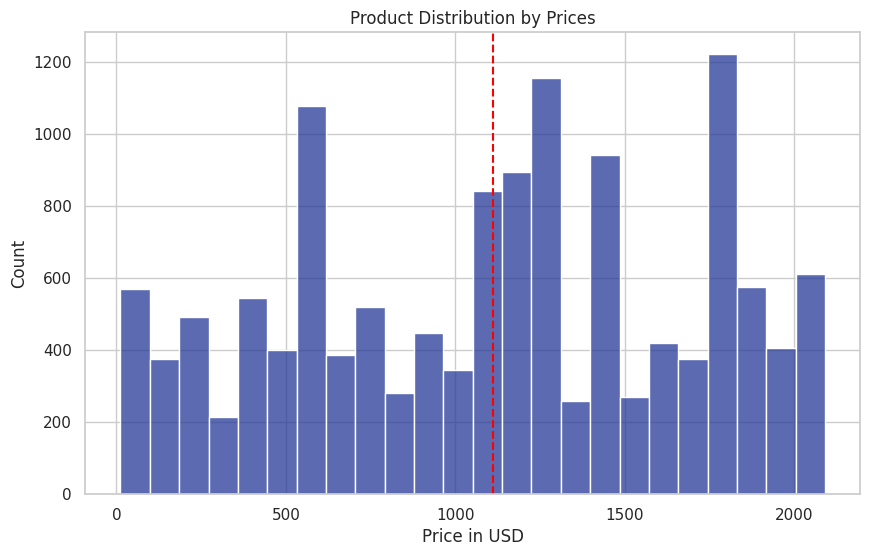

Mean:  1110.1365079248606


In [286]:
# Product Distribution by Prices

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=MasterClean, x='list_price')
plt.title('Product Distribution by Prices')
plt.xlabel('Price in USD')
plt.ylabel('Count')
plt.axvline(MasterClean['list_price'].mean(), color='red', linestyle='--', label='Mean')
plt.show()

print('Mean: ', MasterClean['list_price'].mean())

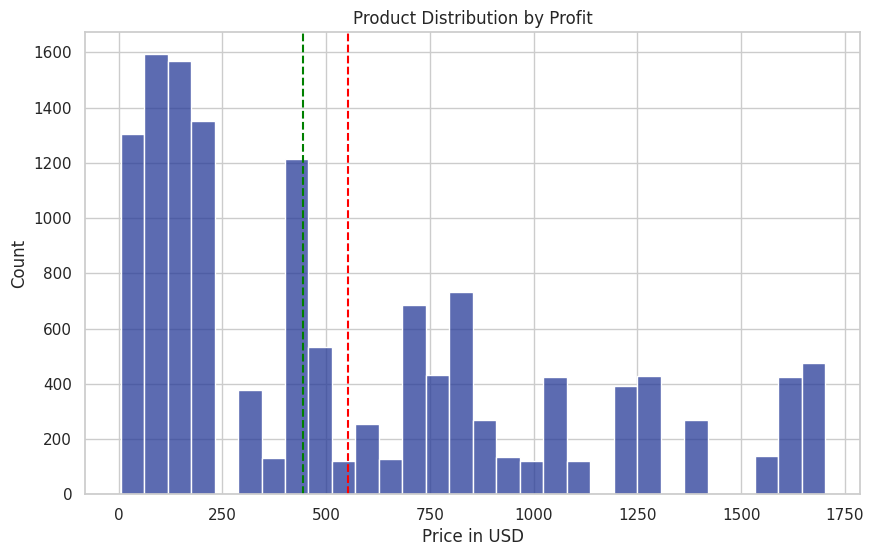

Mean:  552.2205679483417
Median:  445.2099999999999


In [287]:
# Product Distribution by Profit

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=MasterClean, x='profit')
plt.title('Product Distribution by Profit')
plt.xlabel('Price in USD')
plt.ylabel('Count')
plt.axvline(MasterClean['profit'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(MasterClean['profit'].median(), color='green', linestyle='--', label='Median')
plt.show()

print('Mean: ', MasterClean['profit'].mean())
print('Median: ', MasterClean['profit'].median())

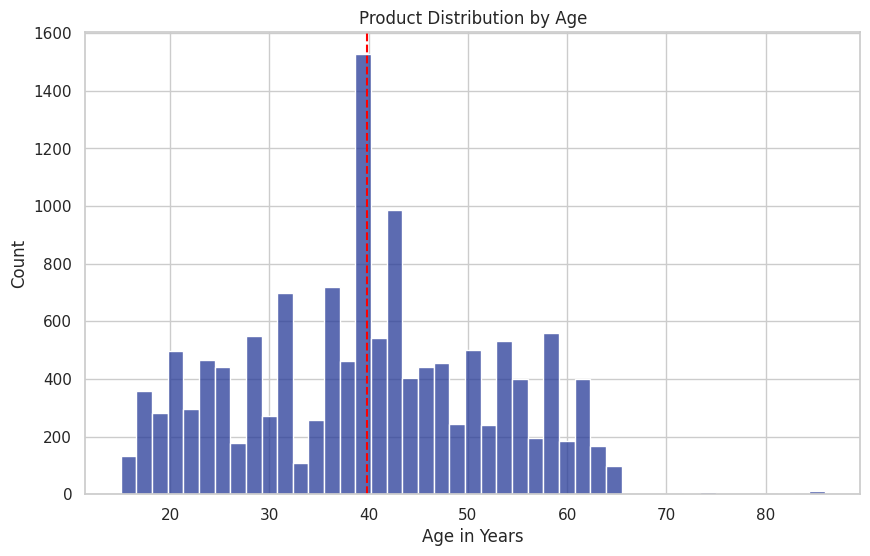

Mean:  39.8009245670678


In [288]:
# Product Distribution by age

import matplotlib.pyplot as plt
import seaborn as sns

# Convert customer_age to int64 instead of Int64
MasterClean['customer_age'] = MasterClean['customer_age'].astype('int64')

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=MasterClean, x='customer_age')
plt.title('Product Distribution by Age')
plt.xlabel('Age in Years')
plt.ylabel('Count')
plt.axvline(MasterClean['customer_age'].mean(), color='red', linestyle='--', label='Mean')
plt.show()

print('Mean: ', MasterClean['customer_age'].mean())


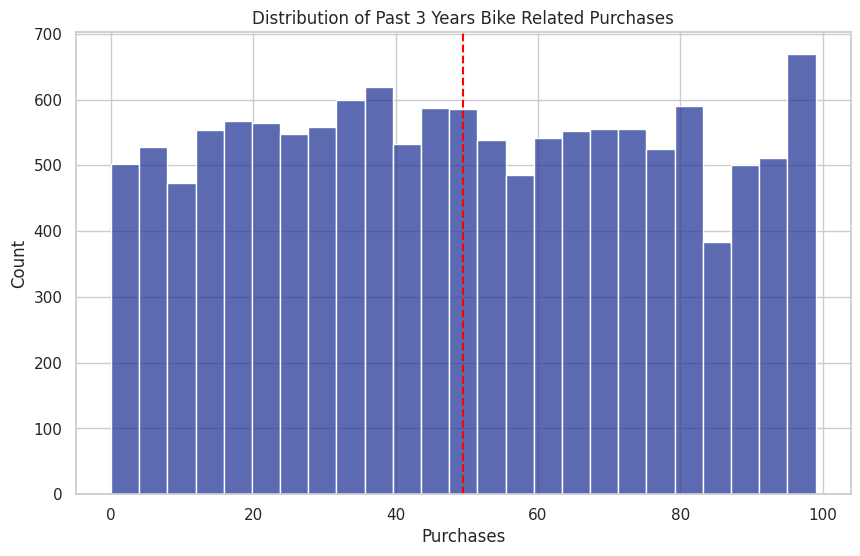

Mean:  49.495450542999706


In [289]:
# Product Distribution by age

import matplotlib.pyplot as plt
import seaborn as sns

# Convert customer_age to int64 instead of Int64
MasterClean['past_3_years_bike_related_purchases'] = MasterClean['past_3_years_bike_related_purchases'].astype('int64')

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(data=MasterClean, x='past_3_years_bike_related_purchases')
plt.title('Distribution of Past 3 Years Bike Related Purchases')
plt.xlabel('Purchases')
plt.ylabel('Count')
plt.axvline(MasterClean['past_3_years_bike_related_purchases'].mean(), color='red', linestyle='--', label='Mean')
plt.show()

print('Mean: ', MasterClean['past_3_years_bike_related_purchases'].mean())

age_group
31-50    52.355445
14-30    25.476959
51-70    21.969475
71-90     0.198122
Name: proportion, dtype: float64


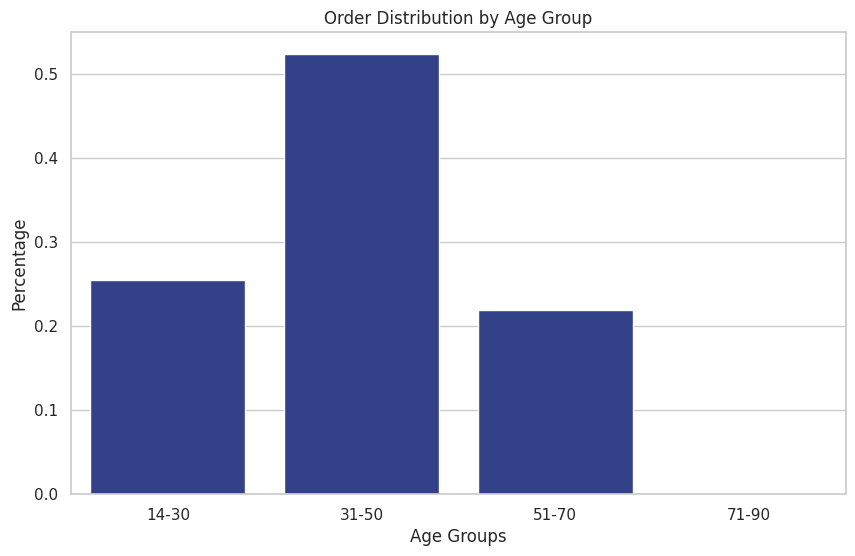

In [290]:
# Order Distribution by Age Group

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
base_color = sns.color_palette()[0]

counts = MasterClean['age_group'].value_counts(normalize=True)
sns.barplot(x= counts.index, y=counts.values, color=base_color)
plt.xlabel('Age Groups')
plt.ylabel('Percentage')
print(counts * 100)

plt.title('Order Distribution by Age Group')
plt.show()

/tmp/ipykernel_2633/3743981089.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



  age_group      profit
0     14-30  1916582.54
1     31-50  3944529.54
2     51-70  1648972.98
3     71-90    15576.84


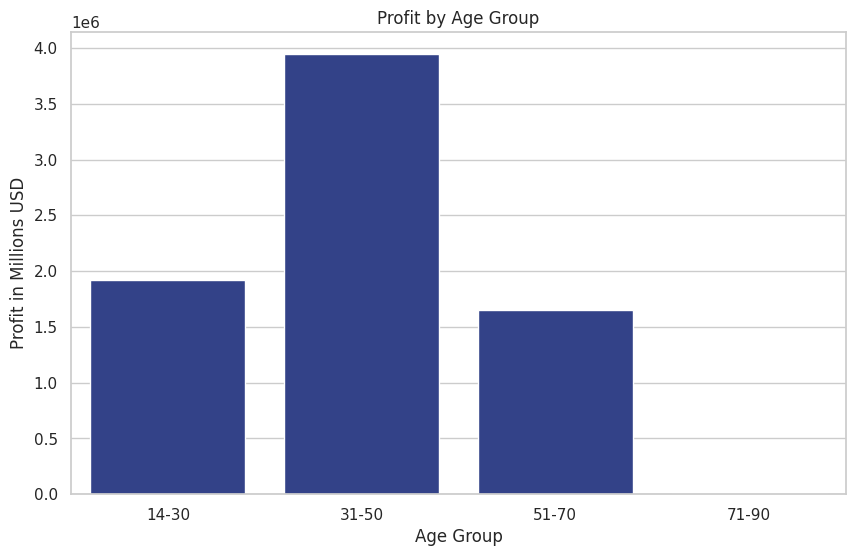

In [291]:
# Profit Distribution by Age Group

import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(10, 6))
base_color = sns.color_palette()[0]
profit_by_age = MasterClean.groupby('age_group')['profit'].sum().reset_index()
sns.barplot(x='age_group', y='profit', data=profit_by_age, color=base_color)

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Profit in Millions USD')
plt.title('Profit by Age Group')

print(profit_by_age.head())

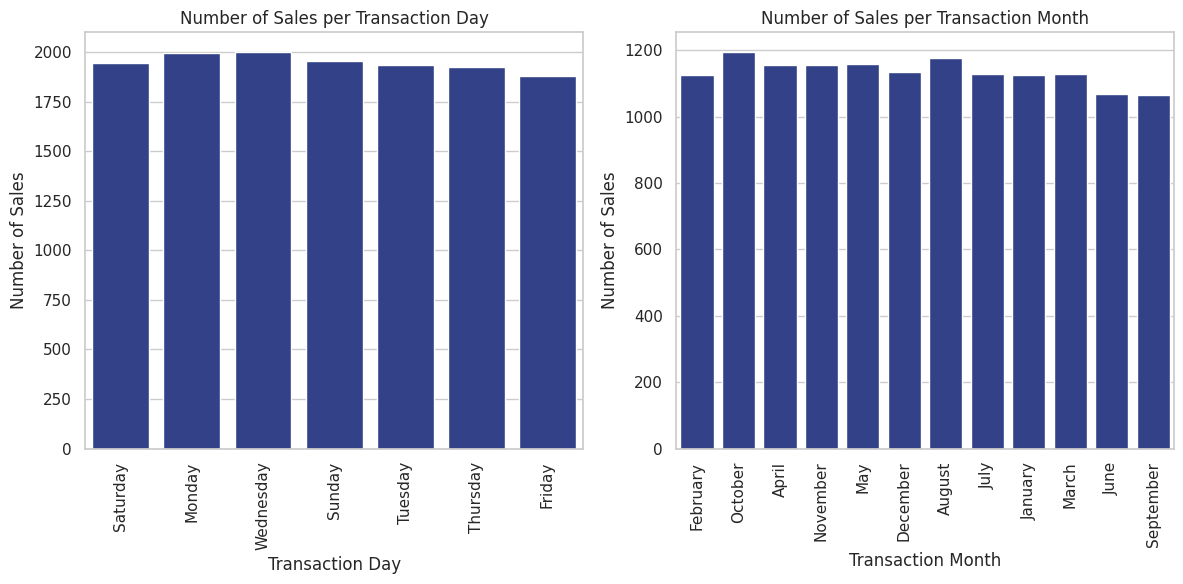

In [292]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Bar plot for transaction day
plt.subplot(1, 2, 1)  # Subplot 1
sns.countplot(data=MasterClean, x='transaction_day', color=base_color)
plt.title('Number of Sales per Transaction Day')
plt.xticks(rotation=90)
plt.xlabel('Transaction Day')
plt.ylabel('Number of Sales')

# Bar plot for transaction month
plt.subplot(1, 2, 2)  # Subplot 2
sns.countplot(data=MasterClean, x='transaction_month', color=base_color)
plt.title('Number of Sales per Transaction Month')
plt.xlabel('Transaction Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

wealth_segment
Mass Customer        49.713824
High Net Worth       25.447608
Affluent Customer    24.838568
Name: proportion, dtype: float64


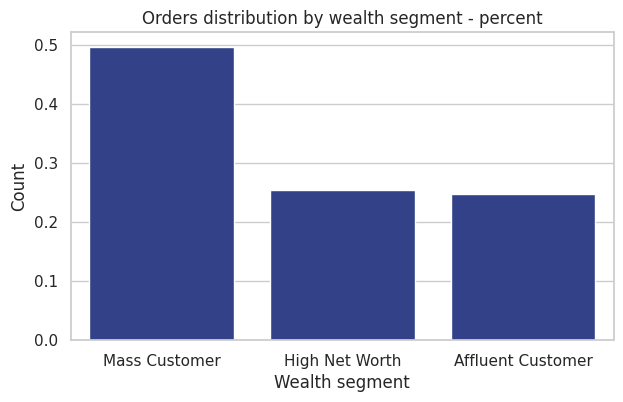

In [293]:
#Orders distribution by wealth segment
plt.figure(figsize = (7,4), dpi = 100)

counts = MasterClean['wealth_segment'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('Wealth segment')
plt.ylabel('Count')
print(counts * 100)

plt.title("Orders distribution by wealth segment - percent")
plt.show()

state
NSW    52.839742
VIC    25.036689
QLD    22.050191
ACT     0.073378
Name: proportion, dtype: float64


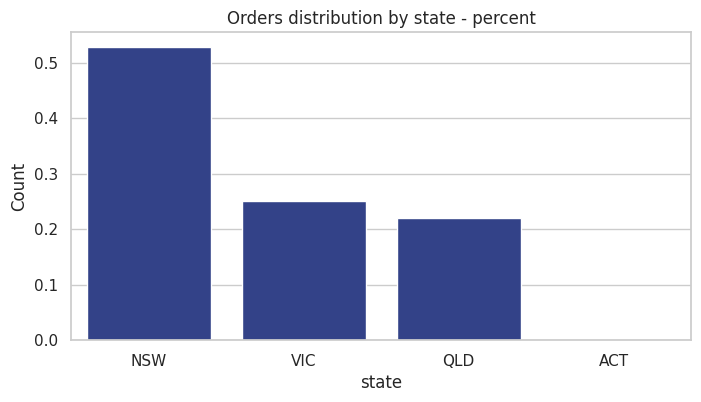

In [294]:
# Orders distribution by state
plt.figure(figsize = (8,4), dpi = 100)
counts = MasterClean['state'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('state')
plt.ylabel('Count')
print(counts * 100)

plt.title("Orders distribution by state - percent")
plt.show()

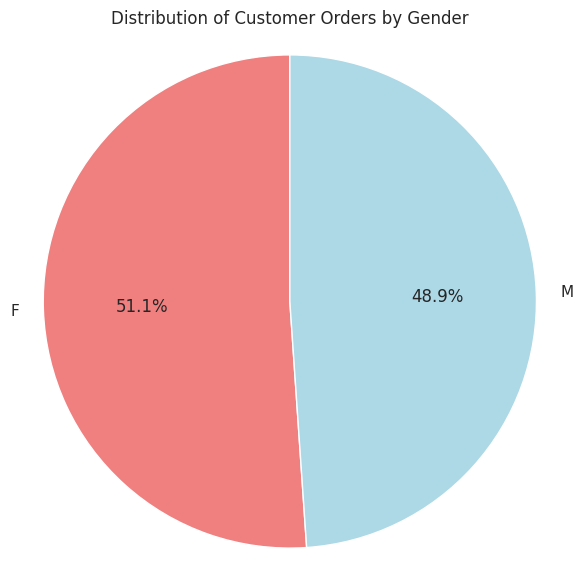

In [295]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7), dpi=100)

counts = MasterClean['gender'].value_counts(normalize=True)
labels = counts.index
sizes = counts.values
colors = ['lightcoral', 'lightblue']  # You can customize the colors here

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.title("Distribution of Customer Orders by Gender")
plt.show()

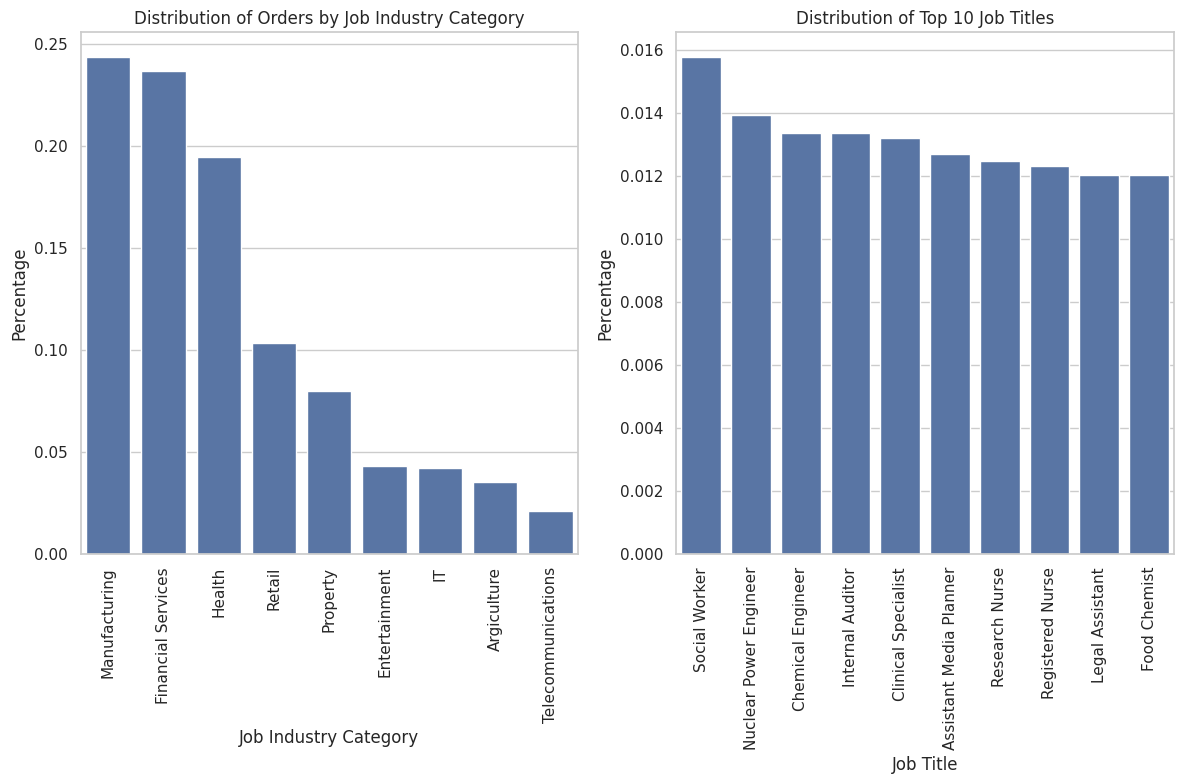

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))

# Plotting the distribution of orders by job industry category
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
counts_industry = MasterClean['job_industry_category'].value_counts(normalize=True)
sns.barplot(x=counts_industry.index, y=counts_industry.values, color='b')
plt.xlabel('Job Industry Category')
plt.ylabel('Percentage')
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.title("Distribution of Orders by Job Industry Category")

# Plotting the distribution of top 10 job titles
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
top_10_titles = MasterClean['job_title'].value_counts(normalize=True).head(10)
sns.barplot(x=top_10_titles.index, y=top_10_titles.values, color='b')
plt.xlabel('Job Title')
plt.ylabel('Percentage')
plt.xticks(rotation=90)  # Rotate x-axis labels to 90 degrees
plt.title("Distribution of Top 10 Job Titles")

plt.tight_layout()  # To prevent overlapping labels and titles
plt.show()

## Bivariate Analysis
In this section we will investigate pair of variables and check if there is any relationship between them.

### Highlights from the Bivariate Analysis
- More of women who own a car buy bikes, and more of men who do not own a car buy bikes
- NSW has the highest number of bike buyers and more Female buyers than male buyers
- More women buy bikes online than men
- Most profitable brand is WeareA2B

These are usually best left to dashboards since it requires too much code to plot in pandas.

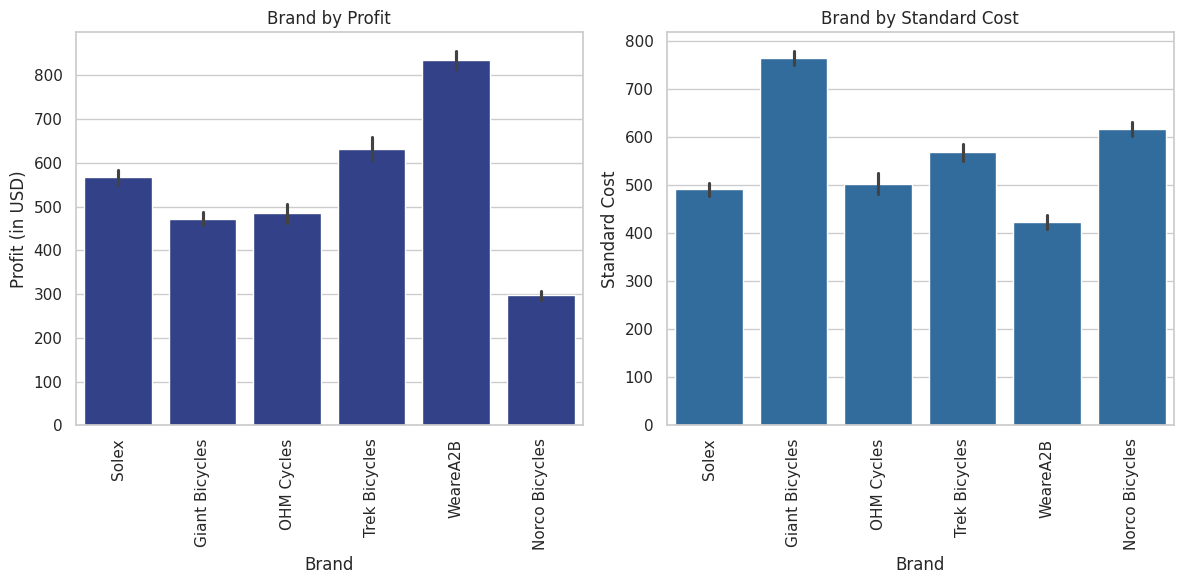

In [297]:
# Brand by Profit and Standard Cost

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))

# First subplot - Profit by Brand
plt.subplot(1, 2, 1)
sns.barplot(data=MasterClean, x="brand", y='profit', color=sns.color_palette()[0])
plt.xlabel('Brand')
plt.ylabel('Profit (in USD)')
plt.xticks(rotation=90)
plt.title("Brand by Profit")

# Second subplot - Standard Cost by Brand
plt.subplot(1, 2, 2)
sns.barplot(data=MasterClean, x="brand", y='standard_cost', color=sns.color_palette()[1])
plt.xlabel('Brand')
plt.ylabel('Standard Cost')
plt.xticks(rotation=90)
plt.title("Brand by Standard Cost")

plt.tight_layout()
plt.show()

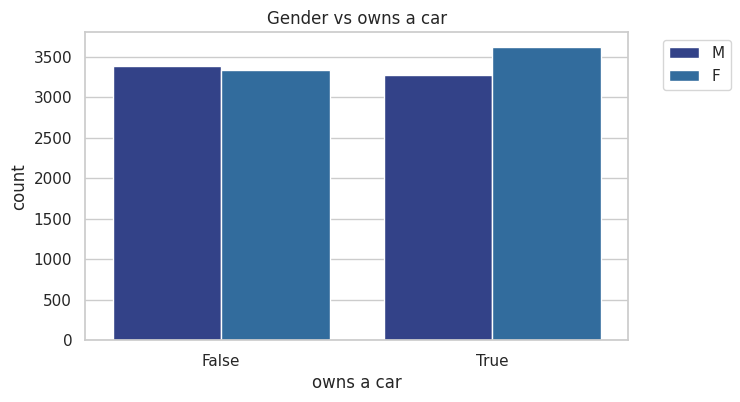

In [298]:
#Gender vs owns a car

plt.figure(figsize = (7,4), dpi = 100)

sns.countplot(data = MasterClean, x = "owns_car",hue='gender')
plt.xlabel('owns a car');
plt.ylabel('count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Gender vs owns a car")

plt.show()

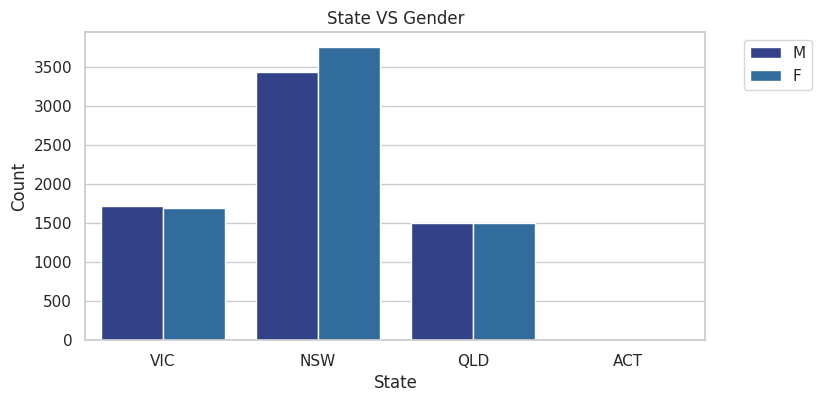

In [299]:
#State vs Gender

plt.figure(figsize = (8,4), dpi = 100)

sns.countplot(data = MasterClean, x = "state",hue='gender')
plt.xlabel('State');
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("State VS Gender")

plt.show()

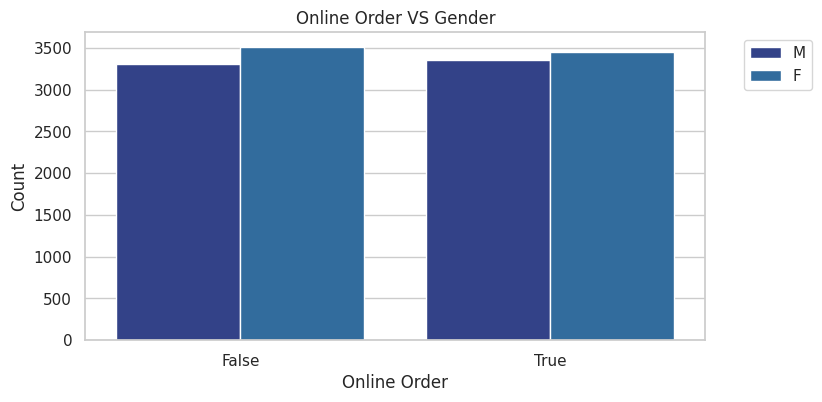

In [300]:
#State vs Gender

plt.figure(figsize = (8,4), dpi = 100)

sns.countplot(data = MasterClean, x = "online_order",hue='gender')
plt.xlabel('Online Order');
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Online Order VS Gender")

plt.show()

/tmp/ipykernel_2633/1747977723.py:21: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_2633/1747977723.py:33: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



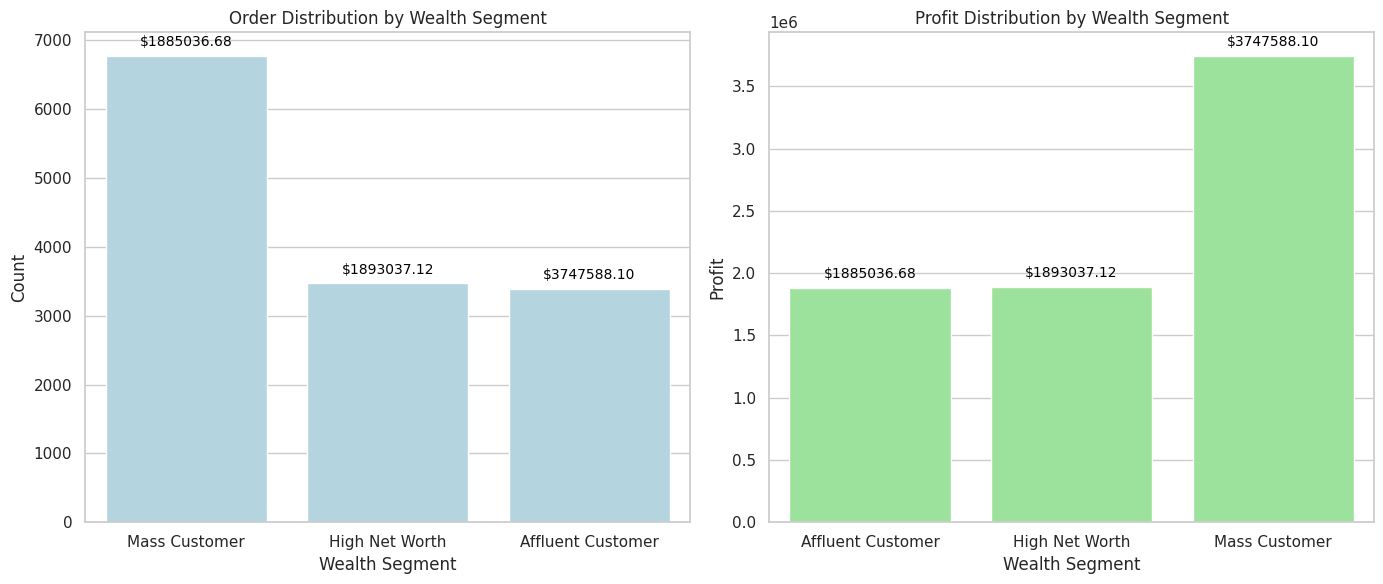

In [301]:
# Wealth Segment Percentage and Profits

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), dpi=100)

# Calculate the order count and profit per wealth segment
counts = MasterClean['wealth_segment'].value_counts()
profits = MasterClean.groupby('wealth_segment')['profit'].sum()

# Normalize the counts to percentages
counts_percent = (counts / counts.sum()) * 100

# Create a bar plot for order distribution
sns.barplot(x=counts_percent.index, y=counts.values, color='lightblue', ax=ax1)
ax1.set_xlabel('Wealth Segment')
ax1.set_ylabel('Count')
ax1.set_title("Order Distribution by Wealth Segment")

# Add profit labels to the bars in the order distribution plot
for i, p in enumerate(ax1.patches):
    ax1.annotate(f'${profits[i]:.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Create a bar plot for profit distribution
sns.barplot(x=profits.index, y=profits.values, color='lightgreen', ax=ax2)
ax2.set_xlabel('Wealth Segment')
ax2.set_ylabel('Profit')
ax2.set_title("Profit Distribution by Wealth Segment")

# Add profit labels to the bars in the profit distribution plot
for i, p in enumerate(ax2.patches):
    ax2.annotate(f'${profits[i]:.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

## Multivariate Analysis
In this section we will use correlation matrix to find the correlation between the variables.
Nothing of what we already don't know.

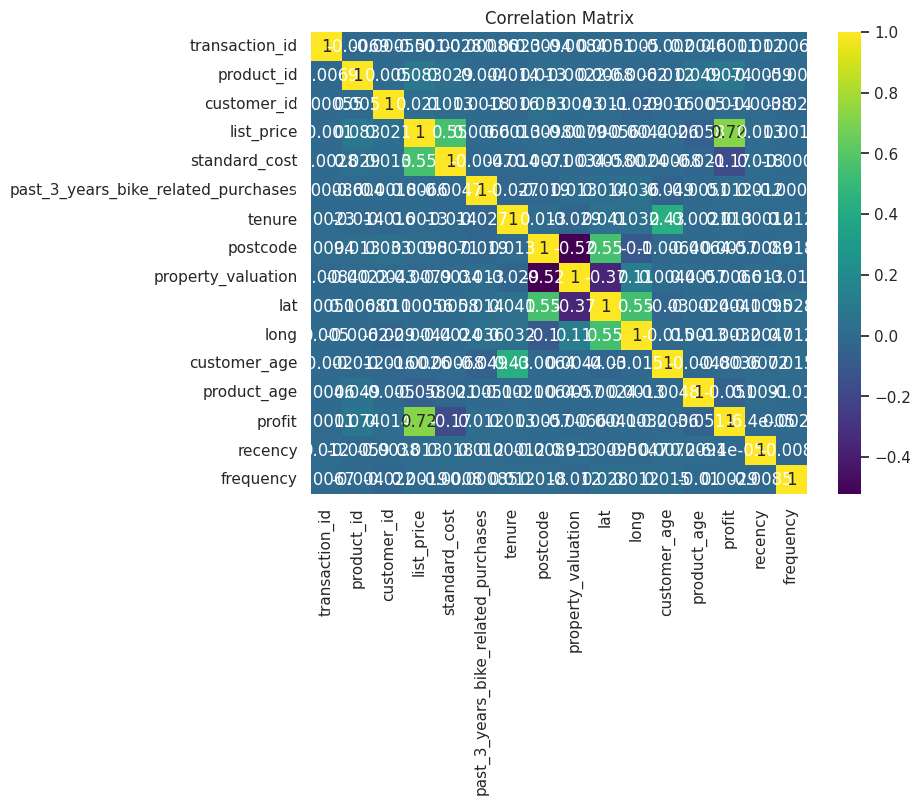

In [302]:
# Drop non-numeric columns or encode them properly
numeric_columns = MasterClean.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create the correlation matrix heatmap
plt.figure(figsize=(8,6), dpi=100)
sns.heatmap(correlation_matrix, cmap="viridis", annot=True)
plt.title("Correlation Matrix")
plt.xticks(rotation=90)
plt.show()

# Task 2 : RFM Analysis
RFM stands for Recency, Frequency and Monetary Value, it is a customer segmentation technique that uses past purchase behavior to divide customers into groups.
This will include the following steps:
- Calculating the `recency` column i.e the number of days since the last purchase
- Calculating the `frequency` column i.e the number of purchases made by a unique customer
- Calculating the `monetary` column i.e the total amount of money spent by a unique customer
- Making the `RFM` dataframe by merging the three columns

Usually we would calculate an RFM score which is also fairly easy to do, but we will be using K-Means clustering to make customer segments instead.
We will be using standard scaler and elbow method to find the optimal number of clusters.

### Creating the RFM Table
- Since we already have the `recency`, `frequency` and `profit` columns, we can make the RFM table by merging them.
- We will later map them to the master dataframe


In [303]:
# Generating the RFM Table
RfmTable = Postcoded.groupby("customer_id").agg(
    {
        "recency": lambda x: x.min(),
        "frequency": lambda x: x.count(),
        "profit": lambda x: x.sum(),
    }
)

RfmTable.rename(
    columns={
        "recency": "recency",
        "frequency": "frequency",
        "profit": "monetary",
    },
    inplace=True,
)

RfmTable.head()

recency  frequency  monetary
customer_id                              
1                  9         11   3018.09
2                130          3   2226.26
4                197          2    220.57
5                 18          6   2394.94
6                 66          5   3946.55

### Finding the Optimal Number of Clusters
- We wrote a function to scale the features (using standard scaler)
- We wrote a function to fit the KMeans algorithm on the scaled features and return the model as well as the predictions
- Make sure to run this only on the clean rfm dataframe

The elbow methods shows that the optimal number of clusters is 3, so we will classify each customer into one of these clusters.

In [304]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def plot_elbow_method(df):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df)

    inertia = []
    for i in np.arange(1, 11):
        kmeans = KMeans(n_clusters=i, n_init=10, random_state=1) # n_init is the number of times the K-mean algorithm will run with different centroid seeds (default=10), explicityly set to 10 to suppress warning
        kmeans.fit(scaled)
        inertia.append(kmeans.inertia_)

    plt.plot(np.arange(1, 11), inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()
    
    return scaled

# Example usage:
# Assuming you have a DataFrame called 'rfm_table', you can call the function like this:
# plot_elbow_method(rfm_table)

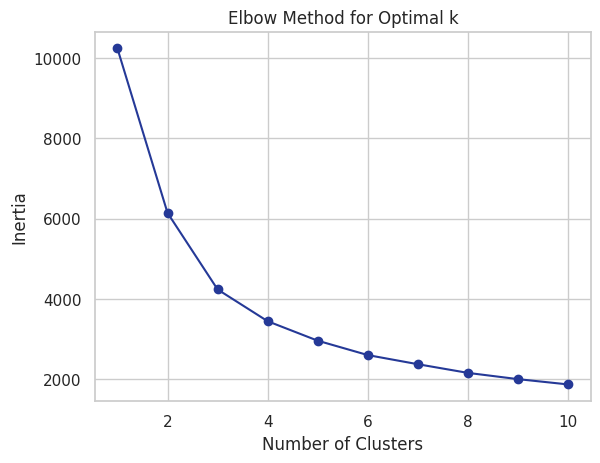

In [305]:
scaled_array = plot_elbow_method(RfmTable)

### Classifying the Customers
Now that we have the clusters, we will analyse the clusters and see which cluster has the highest profit, and then we will map the customer IDs to the clusters and then predict the high value customers.

- Gold customers are comparatively less in number but have the highest profit
- Silver customers are the most in number but struggle to keep up with the gold customers
- Bronze customers are the least in number, have the best profit to customer ratio but have the lowest overall profit
- Also Bronze customers very rarely buy any products

In [306]:
# Use k-means to cluster the RFM table

kmeans = KMeans(n_clusters=3, n_init=10, random_state=10)
kmeans.fit(scaled_array)

# +1 to make the clusters start from 1 instead of 0
RfmTable['cluster'] = kmeans.labels_+1
RfmTable.head()

recency  frequency  monetary  cluster
customer_id                                       
1                  9         11   3018.09        2
2                130          3   2226.26        3
4                197          2    220.57        3
5                 18          6   2394.94        1
6                 66          5   3946.55        1

In [307]:
# Using a ClusterMap to group clusters by their average RFM values

ClusterMap = RfmTable.groupby("cluster").agg(
    {
        "recency": "mean",
        "frequency": "mean",
        "monetary": "mean",
    }
)
ClusterMap["cluster_size"] = RfmTable.groupby("cluster")["cluster"].count()

# Sorting the ClusterMap by monetary_value in descending order
SortedClusterMap = ClusterMap.sort_values(by="monetary", ascending=False)

# Preparing the customer_category column
# customer_category = ["Platinum","Gold", "Silver", "Bronze"]
customer_category = ["Gold", "Silver", "Bronze"]
SortedClusterMap["customer_category"] = customer_category

CategoryCluster = SortedClusterMap["customer_category"].to_dict()

SortedClusterMap

recency  frequency     monetary  cluster_size customer_category
cluster                                                                    
2         40.156137   8.150722  5023.386372          1108              Gold
1         43.959677   4.846198  2312.542056          1736            Silver
3        166.327465   3.642606  1871.216673           568            Bronze

### Visualizing the Clusters
- We will make an interactive cluster plot using plotly and see if we can find any insights.
- We will also use seaborn to make a cluster plot.


In [308]:
# Using Plotly to plot the ClusterMap

import plotly.express as px

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    RfmTable,
    x='recency',
    y='frequency',
    z='monetary',
    color='cluster',
    size_max=10,
    opacity=0.7,
    labels={'recency': 'Recency', 'frequency': 'Frequency', 'monetary': 'Monetary'},
    title='RFM Clusters - Interactive 3D Scatter Plot'
)

fig.show()

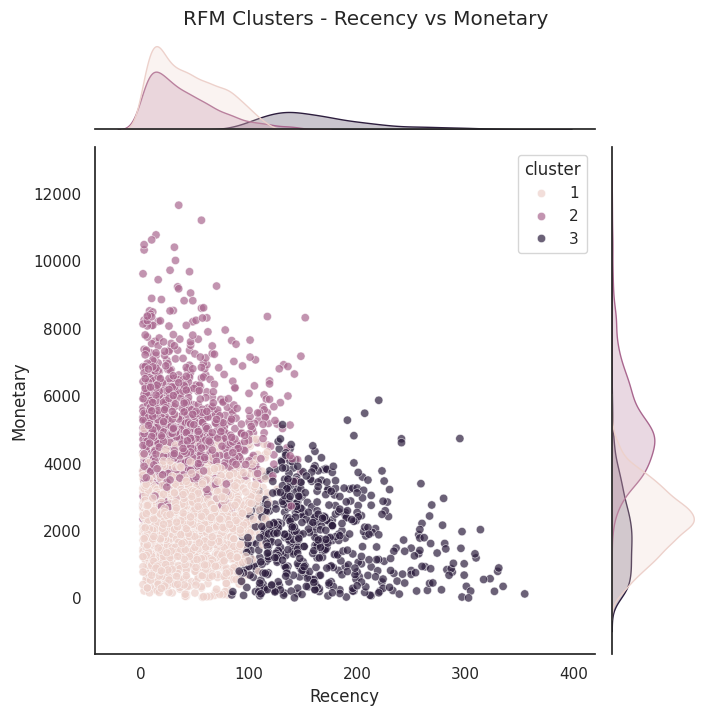

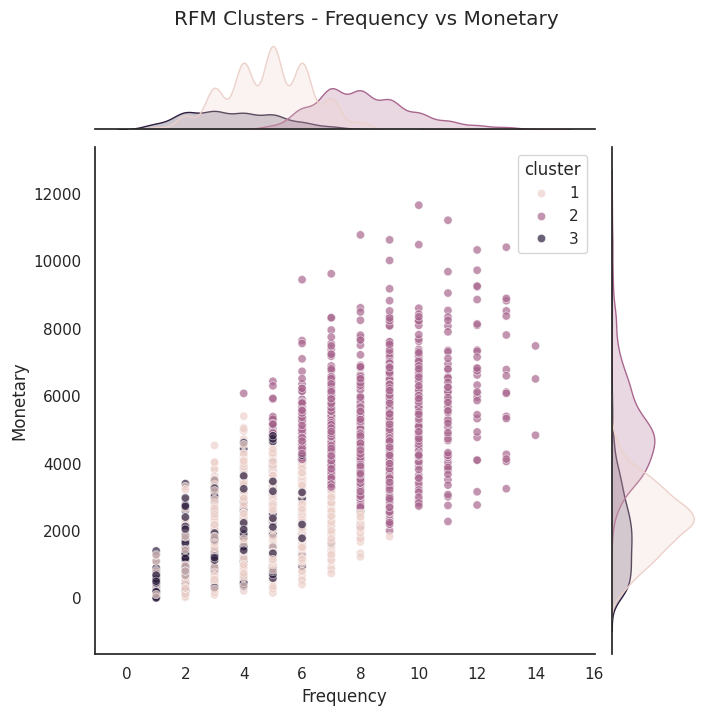

In [309]:
# Using SeaBorn to plot the ClusterMap

import seaborn as sns
import matplotlib.pyplot as plt

# Create a joint plot for 'recency' and 'monetary'
sns.set(style="white")
fig1 = sns.jointplot(
    data=RfmTable,
    x='recency',
    y='monetary',
    hue='cluster',
    alpha=0.7,
    markers=["o", "s", "D"],
    height=7
)
fig1.set_axis_labels('Recency', 'Monetary')
fig1.fig.suptitle('RFM Clusters - Recency vs Monetary', y=1.02)

# Create a joint plot for 'frequency' and 'monetary'
fig2 = sns.jointplot(
    data=RfmTable,
    x='frequency',
    y='monetary',
    hue='cluster',
    alpha=0.7,
    markers=["o", "s", "D"],
    height=7
)
fig2.set_axis_labels('Frequency', 'Monetary')
fig2.fig.suptitle('RFM Clusters - Frequency vs Monetary', y=1.02)

# Display the subplots
plt.show()

### Mapping the Clusters to the Master Dataframe
- This will add two new columns to the master dataframe, `cluster` and `customer_category`

In [310]:
# Mapping the clusters to the customers
Postcoded['cluster'] = Postcoded['customer_id'].map(RfmTable['cluster'])
Postcoded['customer_category'] = Postcoded['cluster'].map(CategoryCluster)

In [311]:
Postcoded.sample(5)

transaction_id  product_id  customer_id transaction_date online_order  \
13190            6255           0         1821       2017-10-20        False   
17919            9752          66         3050       2017-08-02         True   
6934             3099           0         3313       2017-05-18         True   
10878           13456          28          209       2017-06-20         True   
15841           11855          30         1369       2017-07-05        False   

       order_status           brand product_line product_class product_size  \
13190          True           Solex     Standard        medium       medium   
17919          True           Solex     Standard        medium       medium   
6934           True      OHM Cycles     Standard          high       medium   
10878          True  Norco Bicycles     Standard        medium        small   
15841          True           Solex     Standard          high       medium   

       list_price  standard_cost    product_first_sold_date first_name  \
13190      100.35          75.26 1997-09-22 02:14:37.994342     Fields   
17919     1163.89         589.27 2010-07-22 02:14:37.994342     Dinnie   
6934       227.88         136.73 2010-07-22 02:14:37.994342       Kori   
10878     1216.14        1082.36 2007-03-25 02:14:37.994342      Udall   
15841      748.17         448.90 1993-08-01 02:14:37.994342       Ilka   

      last_name gender  past_3_years_bike_related_purchases        DOB  \
13190     Bayne      M                                   89 1972-03-09   
17919    Worsom      F                                   90 1997-12-04   
6934   Antoshin      F                                   10 1995-03-15   
10878   Bellard      M                                    9 1957-08-28   
15841  Allabush      F                                   51 1994-05-08   

                           job_title job_industry_category     wealth_segment  \
13190               Web Developer IV         Entertainment     High Net Worth   
17919                            NaN                   NaN     High Net Worth   
6934                             NaN              Property     High Net Worth   
10878  Analog Circuit Design manager                   NaN  Affluent Customer   
15841                 Civil Engineer         Manufacturing      Mass Customer   

      deceased_indicator owns_car  tenure                address  postcode  \
13190              False     True      15     3201 Canary Center      2540   
17919              False    False       5       6 Westend Center      2546   
6934               False     True       5   81 Westerfield Point      2768   
10878              False     True       6  528 Mandrake Crossing      2222   
15841              False     True       6      3 Schlimgen Alley      3201   

         country  property_valuation        lat        long state  \
13190  Australia                   9 -34.863483  150.616440   NSW   
17919  Australia                   6 -36.254860  150.225372   NSW   
6934   Australia                  10 -33.737863  150.922732   NSW   
10878  Australia                  11 -33.964713  151.084774   NSW   
15841  Australia                   6 -38.092874  145.177905   VIC   

       customer_age  product_age age_group  profit  recency  frequency  \
13190            45         20.0     31-50   25.09       73         12   
17919            20          7.0     14-30  574.62      152          9   
6934             22          7.0     14-30   91.15      228          6   
10878            60         10.0     51-70  133.78      195          5   
15841            23         24.0     14-30  299.27      180          4   

      transaction_day transaction_week transaction_month  cluster  \
13190          Friday               42           October        2   
17919       Wednesday               31            August        2   
6934         Thursday               20               May        1   
10878         Tuesday               25              June        1   


# Task 2 : Geospatial Analysis
In this section we will only focus on geopandas and try to make customer segmentation maps.
- ~~We will also try to geocode the customer adresses to get another lat and long column `geo_lat` and `geo_long`~~
- Geocoding will take a lot of time so we'll just work the with the coordinates we already have


Seems like our most sales are in coastal areas, with that lovely view guess I'll buy a bike too.

- We will make a new column `distance_from_coast` which will be the distance of the customer from the coast
- NSW has the most sales, and the most sales are in the coastal areas of NSW
- Followed by Victoria and then Queensland

In [312]:
# Pepraring the GeoCustomers dataframe
# We will use this to draw interactive maps

GeoCustomers = Postcoded.copy()

# Use groupby to get unique customer_id 
GeoCustomers = GeoCustomers.groupby('customer_id').first().reset_index()
GeoCustomers = GeoCustomers[['customer_id', 'lat', 'long', 'state', 'cluster', 'customer_category']]

GeoCustomers.head()

customer_id        lat        long state  cluster customer_category
0            1 -33.894912  151.206211   NSW        2              Gold
1            2 -33.731651  150.955942   NSW        3            Bronze
2            4 -28.035453  153.241258   QLD        3            Bronze
3            5 -30.604667  152.956681   NSW        1            Silver
4            6 -38.215906  144.334005   VIC        1            Silver

### Marker Cluster

In [313]:
# Importing Folium and Geopandas
import geopandas as gpd
import folium

# Importing folium plugins
from folium.plugins import MarkerCluster, HeatMap

# Creating a simple map
m_1 = folium.Map(location=[-25.2744, 133.7751], tiles='cartodbpositron', zoom_start=4)

# Adding transaction points to the map using MarkerCluster
mc = MarkerCluster()
for idx, row in GeoCustomers.iterrows():
    if not np.isnan(row['lat']) and not np.isnan(row['long']):
        mc.add_child(folium.Marker([row['lat'], row['long']]))
        
m_1.add_child(mc)

# Display the map
m_1

### Heatmap

In [314]:
# Drawing a heatmap of the transaction points
m_2 = folium.Map(location=[-25.2744, 133.7751], tiles='cartodbpositron', zoom_start=4)

# Adding transaction points to the map using HeatMap
HeatMap(data=GeoCustomers[['lat', 'long']], radius=15).add_to(m_2)

# Display the map
m_2


### Bubble Map

In [315]:
# Draw a bubble map to visualize the customer catergories gold, silver and bronze

# Create a base map
m_3 = folium.Map(location=[-25.2744, 133.7751], tiles='cartodbpositron', zoom_start=4)

# Add a bubble map to the base map
for idx, row in GeoCustomers.iterrows():
    if not np.isnan(row['lat']) and not np.isnan(row['long']):
        if row['customer_category'] == 'Gold':
            folium.CircleMarker([row['lat'], row['long']], radius=5, color='yellow', fill=True).add_to(m_3)
        elif row['customer_category'] == 'Silver':
            folium.CircleMarker([row['lat'], row['long']], radius=5, color='blue', fill=True).add_to(m_3)
        elif row['customer_category'] == 'Bronze':
            folium.CircleMarker([row['lat'], row['long']], radius=5, color='brown', fill=True).add_to(m_3)
            
# Display the map
m_3
            

## Analysing Coastline Proximity
Refer to this [notebook](https://www.kaggle.com/code/notcostheta/shortest-distance-to-a-coastline/notebook) for the code.


In [316]:
GeoCustomers

customer_id        lat        long state  cluster customer_category
0               1 -33.894912  151.206211   NSW        2              Gold
1               2 -33.731651  150.955942   NSW        3            Bronze
2               4 -28.035453  153.241258   QLD        3            Bronze
3               5 -30.604667  152.956681   NSW        1            Silver
4               6 -38.215906  144.334005   VIC        1            Silver
...           ...        ...         ...   ...      ...               ...
3407         3496 -33.937716  150.848737   NSW        3            Bronze
3408         3497 -38.043995  145.264296   VIC        1            Silver
3409         3498 -37.807135  144.861162   VIC        3            Bronze
3410         3499 -27.549179  152.951385   QLD        2              Gold
3411         3500 -33.766409  151.257781   NSW        3            Bronze

[3412 rows x 6 columns]

In [317]:
from shapely.ops import nearest_points, Point
import haversine as hs
from haversine import Unit

def coastline_minima(df, lat_col, long_col, country):
    """
    This function takes in a dataframe with latitude and longitude columns and returns the nearest point on the coastline and the distance in km

    Required libraries: geopandas, shapely, folium, haversine
    Returns: original dataframe with two new columns: nearest_point and distance_to_coast

    """
    # Getting the coastline
    world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    coastline = world[world.name.str.contains(country)].boundary

    # Creating empty lists to store the nearest point and the distance
    nearest_points_list = []
    distance_list = []

    for i in range(len(df)):
        geo = Point(df[long_col][i], df[lat_col][i])
        nearest = nearest_points(geo, coastline)[1]
        cos = Point(nearest.x, nearest.y)
        loc1 = (geo.y, geo.x)
        loc2 = (cos.y, cos.x)
        result = hs.haversine(loc1, loc2, unit=Unit.KILOMETERS)

        nearest_points_list.append(nearest)
        distance_list.append(result)

    # Adding the new columns to the dataframe
    df["nearest_point"] = nearest_points_list
    df["distance_to_coast"] = distance_list

    return df


In [318]:
coastline_minima(GeoCustomers, 'lat', 'long', 'Australia')
GeoCustomers.head()


/tmp/ipykernel_2633/1020208499.py:14: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



customer_id        lat        long state  cluster customer_category  \
0            1 -33.894912  151.206211   NSW        2              Gold   
1            2 -33.731651  150.955942   NSW        3            Bronze   
2            4 -28.035453  153.241258   QLD        3            Bronze   
3            5 -30.604667  152.956681   NSW        1            Silver   
4            6 -38.215906  144.334005   VIC        1            Silver   

                                       nearest_point  distance_to_coast  
0  137    POINT (151.26433 -33.93411)
dtype: geom...           6.910553  
1  137    POINT (151.26176 -33.93792)
dtype: geom...          36.385439  
2  137    POINT (153.45911 -27.91328)
dtype: geom...          25.342373  
3  137    POINT (153.07812 -30.60035)
dtype: geom...          11.632766  
4  137    POINT (144.33147 -38.21284)
dtype: geom...           0.406144

In [319]:
# Merging Geocustomers dataframe with the Postcoded dataframe

Postcoded = pd.merge(
    Postcoded,
    GeoCustomers[['customer_id', 'nearest_point', 'distance_to_coast']],
    how="inner",
    left_on="customer_id",
    right_on="customer_id",
)


In [320]:
Postcoded.sample(5)

transaction_id  product_id  customer_id transaction_date online_order  \
5649             6964          15          755       2017-09-26         True   
16277           13733          19         2479       2017-12-28         True   
12534            9129          89         3486       2017-04-27         True   
445             15784          58         1416       2017-02-01        False   
3351            19360           9         2177       2017-08-20         True   

       order_status           brand product_line product_class product_size  \
5649           True  Norco Bicycles     Standard           low       medium   
16277          True      OHM Cycles         Road          high        large   
12534          True        WeareA2B      Touring        medium        large   
445            True      OHM Cycles         Road        medium       medium   
3351           True      OHM Cycles         Road        medium       medium   

       list_price  standard_cost    product_first_sold_date first_name  \
5649       958.74         748.90 1999-12-20 02:14:37.994342      Baily   
16277       12.01           7.21 2003-03-21 02:14:37.994342      Helge   
12534     1362.99          57.74 1987-05-03 02:14:37.994342      Reece   
445       1280.28         829.51 1985-07-22 02:14:37.994342      Fraze   
3351       742.54         667.40 1985-11-19 02:14:37.994342    Waverly   

      last_name gender  past_3_years_bike_related_purchases        DOB  \
5649     Imison      M                                   31 1993-07-13   
16277    Voller      F                                   81 1996-11-06   
12534  Crewther      M                                   67 1956-07-25   
445        Face      M                                   90 1967-04-30   
3351     Creebo      M                                   35 1977-10-08   

                                  job_title job_industry_category  \
5649                 Senior Cost Accountant    Financial Services   
16277         Community Outreach Specialist                Retail   
12534  Business Systems Development Analyst         Manufacturing   
445                       Assistant Manager                   NaN   
3351                          Social Worker                Health   

       wealth_segment deceased_indicator owns_car  tenure  \
5649    Mass Customer              False    False       4   
16277   Mass Customer              False    False       5   
12534   Mass Customer              False    False      18   
445    High Net Worth              False     True       5   
3351    Mass Customer              False    False       9   

                      address  postcode    country  property_valuation  \
5649          80 Maple Avenue      2536  Australia                   4   
16277    88540 Scoville Plaza      3195  Australia                   9   
12534        8934 Havey Plaza      2548  Australia                   8   
445            21 West Avenue      2155  Australia                  10   
3351   15811 La Follette Park      2770  Australia                   7   

             lat        long state  customer_age  product_age age_group  \
5649  -35.671272  150.125945   NSW            24         18.0     14-30   
16277 -38.007024  145.104105   VIC            21         14.0     14-30   
12534 -36.860723  149.894825   NSW            61         30.0     51-70   
445   -33.731523  150.931074   NSW            50         32.0     31-50   
3351  -33.756443  150.810246   NSW            40         32.0     31-50   

        profit  recency  frequency transaction_day transaction_week  \
5649    209.84       97          3         Tuesday               39   
16277     4.80        4          7        Thursday               52   
12534  1305.25      249          4        Thursday               17   
445     450.77      334          5       Wednesday               05   
3351     75.14      134          5          Sunday               33   

      transaction_month  cluster customer_category  \
56

# Task 3 : Model Development
Final task of this project, we will use all the data and features we built earlier and make a machine learning model to predict which customer segment the new customers will fall into.

We will build two models
- a simple logistic regression model
- a HistGradientBoostingClassifier model

We will also use RandomSearchCV to find the best parameters for the models.

## Data Preprocessing
Lets see what we are working with
- We have `Postcoded` as the Training Data
- We have `NewCustomerList` as the Testing Data

We need to add features to the testing data as well.

In [321]:
Train = Postcoded.copy()
Train.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'country',
       'property_valuation', 'lat', 'long', 'state', 'customer_age',
       'product_age', 'age_group', 'profit', 'recency', 'frequency',
       'transaction_day', 'transaction_week', 'transaction_month', 'cluster',
       'customer_category', 'nearest_point', 'distance_to_coast'],
      dtype='object')

In [322]:
Test = NewCustomerList.copy()
Test.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

## Feature Engineering
We'll be engineering the following features in the test data:
- customer_age
- age_group
- lat, long
- distance_to_coast

So basically we will only be expanding the DOB and postcode columns.
Lets also try and multiply the property_valuation with the tenure, that might do something.

And we will add two more features based on the Property Valuation and Tenure to both the Training and Testing Data

- tenure_valuation_mul
- tenure_valuation_div

And also `potential_customer_id` to the testing data

### Age and Age Group
- customer_age
- age_group

In [323]:
# Customer Age Feature
Test["DOB"] = pd.to_datetime(Test["DOB"])
Test["customer_age"] = (end_date - Test["DOB"]).dt.days // 365.25
Test["customer_age"] = Test["customer_age"].astype("Int64")

# Keeping only the values between 14 and 100
Test = Test[Test["customer_age"].between(14, 100)]


In [324]:
# Calculate the Age Group
age_group = pd.cut(
    Test["customer_age"],
    bins=[14,30,50,70,90],
    labels=["14-30","30-50","50-70","70-90"]
)

Test["age_group"] = age_group

### Geo Location
- lat
- long
- distance_to_coast
- state
- nearest_point

In [325]:
# Adding the Coordinate Columns
Test = pd.merge(
    Test,
    Postcodes[['postcode', 'lat', 'long', 'state']],
    how="inner",
    left_on="postcode",
    right_on="postcode",
)

print(Test.shape)
print(Postcodes.shape)

# Dropping the state_x column
Test.drop(columns="state_x", inplace=True)
Test.rename(columns={"state_y": "state"}, inplace=True)

Test.sample(5)

(983, 23)
(3167, 4)


first_name  last_name gender  past_3_years_bike_related_purchases  \
323   Claudine     Dymick      F                                   28   
511     Evonne  Bembridge      F                                    9   
373      Tanya     Kiefer      F                                   54   
660        Ian      Rabat      M                                   54   
255     Aldric     Birney      M                                   21   

           DOB           job_title job_industry_category     wealth_segment  \
323 1965-12-13     Design Engineer                Health      Mass Customer   
511 1969-07-06  Recruiting Manager                Retail      Mass Customer   
373 1992-07-05  Speech Pathologist    Telecommunications     High Net Worth   
660 1975-08-04      Web Designer I    Financial Services  Affluent Customer   
255 1971-08-19                 NaN         Manufacturing      Mass Customer   

    deceased_indicator owns_car  tenure             address  postcode  \
323              False    False       5     31675 Corry Way      3977   
511              False     True      14  13272 Basil Avenue      3103   
373              False    False       7       4 Warner Park      2146   
660              False    False      11    3 Loeprich Point      3204   
255              False     True      14   5 Caliangt Center      2546   

       country  property_valuation  Rank     Value  customer_age age_group  \
323  Australia                   5   312  1.020000            52     50-70   
511  Australia                   9   259  1.062500            48     30-50   
373  Australia                   9   174  1.168750            25     14-30   
660  Australia                  11   372  0.966875            42     30-50   
255  Australia                   6   310  1.022656            46     30-50   

           lat        long state  
323 -38.146640  145.269510   VIC  
511 -37.811738  145.074116   VIC  
373 -33.789374  150.959508   NSW  
660 -37.916956  145.036783   VIC  
255 -36.254860  150.225372   NSW

In [326]:
# Caculating the distance to coast
Test = coastline_minima(Test, 'lat', 'long', 'Australia')

/tmp/ipykernel_2633/1020208499.py:14: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



### Tenure and Property Valuation
- tenure_valuation_mul
- tenure_valuation_div

In [327]:
# Multiplying and Dividing the tenure and property_valuation

Train["tenure_valuation_mul"] = Train["tenure"] * Train["property_valuation"]
Train["tenure_valuation_div"] = Train["tenure"] / Train["property_valuation"]

# Same for Test

Test["tenure_valuation_mul"] = Test["tenure"] * Test["property_valuation"]
Test["tenure_valuation_div"] = Test["tenure"] / Test["property_valuation"]

### Potential Customer ID
- potential_customer_id

In [328]:
Test['potential_customer_id'] = Test.index + 1

## Building a Basic Logistic Regression Model
- We will copy the training data to `data`
- Look out for leakage while building the model, drop all the columns that are not present in the testing data
- Also drop the columns that can't be classified as numerical or categorical

### Feature Selection
- defining `cols` with all the features that are supposed to go into data

In [329]:
# Getting all the valid columns for building the model

cols = [
    "gender",
    "past_3_years_bike_related_purchases",
    "job_title",
    "job_industry_category",
    "wealth_segment",
    "deceased_indicator",
    "owns_car",
    "tenure",
    "property_valuation",
    "lat",
    "long",
    "state",
    "customer_age",
    "age_group",
    "distance_to_coast",
    "tenure_valuation_mul",
    "tenure_valuation_div",
    "customer_category",
]

data = Train[cols]

In [330]:
# Defining the target variable

target_name = "customer_category"
target = data[target_name]

data = data.drop(columns=target_name)

### Defining Categorical and Numerical Columns
- We will convert all the datatypes appropriately so that there's only either objects or numbers in the dataframe
- We will use sklearns `make_column_selector` to select the columns

In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19513 entries, 0 to 19512
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   gender                               19513 non-null  object  
 1   past_3_years_bike_related_purchases  19513 non-null  Int64   
 2   job_title                            17173 non-null  object  
 3   job_industry_category                16291 non-null  object  
 4   wealth_segment                       19513 non-null  object  
 5   deceased_indicator                   19513 non-null  object  
 6   owns_car                             19513 non-null  object  
 7   tenure                               19513 non-null  Int64   
 8   property_valuation                   19513 non-null  Int64   
 9   lat                                  19513 non-null  float64 
 10  long                                 19513 non-null  float64 
 11  state          

In [332]:
# Convert age_group to object
data["age_group"] = data["age_group"].astype("object")

# Convert bools to object
bool_cols = data.columns[data.dtypes.eq("bool")]
data[bool_cols] = data[bool_cols].astype("object")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19513 entries, 0 to 19512
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               19513 non-null  object 
 1   past_3_years_bike_related_purchases  19513 non-null  Int64  
 2   job_title                            17173 non-null  object 
 3   job_industry_category                16291 non-null  object 
 4   wealth_segment                       19513 non-null  object 
 5   deceased_indicator                   19513 non-null  object 
 6   owns_car                             19513 non-null  object 
 7   tenure                               19513 non-null  Int64  
 8   property_valuation                   19513 non-null  Int64  
 9   lat                                  19513 non-null  float64
 10  long                                 19513 non-null  float64
 11  state                       

In [333]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
category_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
category_columns = category_columns_selector(data)

# Print the lengths of numerical_columns, category_columns, and data.columns
print(f"Number of numerical columns: {len(numerical_columns)}")
print(f"Number of categorical columns: {len(category_columns)}")
print(f"Total number of columns: {len(data.columns)}")

Number of numerical columns: 9
Number of categorical columns: 8
Total number of columns: 17


### Building the Pipeline

In [334]:
# One-hot encoding the categorical columns and standardizing the numerical columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [335]:
# Creating the Transformer and preprocessor object
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    [
        ("cat-preprocessor", categorical_preprocessor, category_columns),
        ("num-preprocessor", numerical_preprocessor, numerical_columns),
    ]
)

In [336]:
# Building a model with a pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat-preprocessor',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'job_title',
                                                   'job_industry_category',
                                                   'wealth_segment',
                                                   'deceased_indicator',
                                                   'owns_car', 'state',
                                                   'age_group']),
                                                 ('num-preprocessor',
                                                  StandardScaler(),
                                                  ['past_3_years_bike_related_purchases',
                                                   'tenure',
                                                   'property_valuation', 'lat',
                                                   'long', 'customer_age',
                                                   'distance_to_coast',
                                                   'tenure_valuation_mul',
                                                   'tenure_valuation_div'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [337]:
# Making the train-test split

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, test_size=0.2, random_state=42
)

In [338]:
_ = model.fit(data_train, target_train)

In [339]:
data_test.head()

gender  past_3_years_bike_related_purchases               job_title  \
9530       F                                   60  Administrative Officer   
385        M                                   68       Financial Analyst   
15307      M                                   56                  Editor   
4153       F                                   78        Quality Engineer   
8658       M                                   23               Librarian   

      job_industry_category     wealth_segment deceased_indicator owns_car  \
9530     Financial Services     High Net Worth              False    False   
385      Financial Services      Mass Customer              False    False   
15307    Financial Services      Mass Customer              False    False   
4153     Financial Services  Affluent Customer              False     True   
8658          Entertainment      Mass Customer              False    False   

       tenure  property_valuation        lat        long state  customer_age  \
9530       12                   7 -37.869072  144.999026   VIC            38   
385         3                  10 -33.731523  150.931074   NSW            36   
15307       5                  10 -37.744406  145.082685   VIC            41   
4153       17                  11 -33.732380  151.000948   NSW            43   
8658       10                   8 -33.783751  150.900547   NSW            48   

      age_group  distance_to_coast  tenure_valuation_mul  tenure_valuation_div  
9530      31-50           3.973526                    84              1.714286  
385       31-50          38.424585                    30                   0.3  
15307     31-50          17.449963                    50                   0.5  
4153      31-50          32.667056                   187              1.545455  
8658      31-50          38.026580                    80                  1.25

### Scores and Predictions
- Model Score `0.5318985395849347`

In [340]:
model.predict(data_test)[:5]

array(['Gold', 'Gold', 'Silver', 'Gold', 'Gold'], dtype=object)

In [341]:
target_test[:5]

9530     Bronze
385        Gold
15307      Gold
4153       Gold
8658       Gold
Name: customer_category, dtype: object

In [342]:
model.score(data_test, target_test)

0.5318985395849347

In [343]:
# Evaluating the model with cross-validation
from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target, cv=5)
cv_results

{'fit_time': array([3.496773  , 2.21952796, 2.07760119, 2.28904366, 1.9299345 ]),
 'score_time': array([0.01913881, 0.02124238, 0.02184558, 0.03157067, 0.01677513]),
 'test_score': array([0.46682039, 0.45836536, 0.46169613, 0.47514095, 0.46258329])}

In [344]:
# Getting the final score for our model

scores = cv_results["test_score"]

# Print mean cross-validation accuracy
print(f"Mean Accuracy: {scores.mean():.3f}")
print(f"Accuracy standard deviation: {scores.std():.3f}")

Mean Accuracy: 0.465
Accuracy standard deviation: 0.006


## Building a Better Model
- `HistGradientBoostingClassifier` is a better model than our naive logistic regression model
- We will use `RandomizedSearchCV` to find the best parameters for the model

Apparently Scaling numerical features is indeed useless for most decision tree models in general and for HistGradientBoostingClassifier in particular.
We get better results with the Ordinal Encoder than with the One Hot Encoder, and Scaling the numerical features does not make a difference.

Visit [here](https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline_sol_02.html) for more information.

|                   | Meaningful order | Non-meaningful order |
|-------------------|------------------|----------------------|
| Tree-based model  | OrdinalEncoder   | OrdinalEncoder       |
| Linear model      | OrdinalEncoder with caution | OneHotEncoder |

- OneHotEncoder : always does something meaningful, but can be unnecessarily slow with trees.
- OrdinalEncoder : can be detrimental for linear models unless your category has a meaningful order and you make sure that OrdinalEncoder respects this order. Trees can deal with OrdinalEncoder fine as long as they are deep enough.


Hence we will use the Ordinal Encoder for the categorical features, for our use case since it is giving us the best score.

### Bulding the Pipeline
- We will build a pipeline with Ordinal Encoder and HistGradientBoostingClassifier


In [345]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42
)

In [346]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)

categorical_preprocessor = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
preprocessor = ColumnTransformer(
    [("cat_preprocessor", categorical_preprocessor, categorical_columns)],
    remainder="passthrough",
)

In [347]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

model = Pipeline(
    [
        ("preprocessor", preprocessor),
        (
            "classifier",
            HistGradientBoostingClassifier(random_state=42, max_leaf_nodes=4),
        ),
    ]
)

model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_preprocessor',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['gender', 'job_title',
                                                   'job_industry_category',
                                                   'wealth_segment',
                                                   'deceased_indicator',
                                                   'owns_car', 'state',
                                                   'age_group'])])),
                ('classifier',
                 HistGradientBoostingClassifier(max_leaf_nodes=4,
                                                random_state=42))])

### Applying RandomizedSearchCV on the Pipeline
- Code referenced form [INRIA MOOC](https://inria.github.io/scikit-learn-mooc/python_scripts/parameter_tuning_randomized_search.html)

```python
The best parameters are:
{'classifier__l2_regularization': 0.022391943681217833,
 'classifier__learning_rate': 0.006270138607046264,
 'classifier__max_bins': 4,
 'classifier__max_leaf_nodes': 142,
 'classifier__min_samples_leaf': 31}
 ```

In [348]:
from scipy.stats import loguniform


class loguniform_int:
    """Integer valued version of the log-uniform distribution"""

    def __init__(self, a, b):
        self._distribution = loguniform(a, b)

    def rvs(self, *args, **kwargs):
        """Random variable sample"""
        return self._distribution.rvs(*args, **kwargs).astype(int)

In [349]:
%%time
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    "classifier__l2_regularization": loguniform(1e-6, 1e3),
    "classifier__learning_rate": loguniform(0.001, 10),
    "classifier__max_leaf_nodes": loguniform_int(2, 256),
    "classifier__min_samples_leaf": loguniform_int(1, 100),
    "classifier__max_bins": loguniform_int(2, 255),
}

model_random_search = RandomizedSearchCV(
    model,
    param_distributions=param_distributions,
    n_iter=5,
    cv=5,
    verbose=1,
    n_jobs=-1,
)
model_random_search.fit(data_train, target_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


CPU times: user 26.8 s, sys: 1.04 s, total: 27.8 s
Wall time: 18.8 s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat_preprocessor',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['gender',
                                                                                'job_title',
                                                                                'job_industry_category',
                                                                                'wealth_segment',
                                                                                'deceased_indicator',
                                                                                'owns_car',
                                                                                'state',
                                                                                'age_group'])])),
                                             ('classifier',
                                              HistGr...
                   param_distributions={'classifier__l2_regularization': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f902c9c4ac0>,
                                        'classifier__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f8fb674a2c0>,
                                        'classifier__max_bins': <__main__.loguniform_int object at 0x7f8fb674a8c0>,
                                        'classifier__max_leaf_nodes': <__main__.loguniform_int object at 0x7f8fb674bc40>,
                                        'classifier__min_samples_leaf': <__main__.loguniform_int object at 0x7f8fb674ba60>},
                   verbose=1)

### Checking Accuracy of the Model

In [350]:
accuracy = model_random_search.score(data_test, target_test)

print(f"The test accuracy score of the best model is {accuracy:.2f}")

The test accuracy score of the best model is 0.73


In [351]:
from pprint import pprint

print("The best parameters are:")
pprint(model_random_search.best_params_)

The best parameters are:
{'classifier__l2_regularization': 0.022391943681217833,
 'classifier__learning_rate': 0.006270138607046264,
 'classifier__max_bins': 4,
 'classifier__max_leaf_nodes': 142,
 'classifier__min_samples_leaf': 31}


In [352]:
# get the parameter names
column_results = [f"param_{name}" for name in param_distributions.keys()]
column_results += ["mean_test_score", "std_test_score", "rank_test_score"]

cv_results = pd.DataFrame(model_random_search.cv_results_)
cv_results = cv_results[column_results].sort_values(
    "mean_test_score", ascending=False
)


def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name


cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

l2_regularization learning_rate max_leaf_nodes min_samples_leaf max_bins  \
1          0.022392       0.00627            142               31        4   
4          5.966058      0.001739             73               66       56   
2          37.34486      0.007085             27                3       68   
3          0.000005       0.00111              3                8        4   
0          0.066776      8.089334             81                3       48   

   mean_test_score  std_test_score  rank_test_score  
1         0.720924        0.004414                1  
4         0.624368        0.009791                2  
2         0.597788        0.015372                3  
3         0.465081        0.000200                4  
0         0.389776        0.025187                5

### Visualizing the Best Parameters

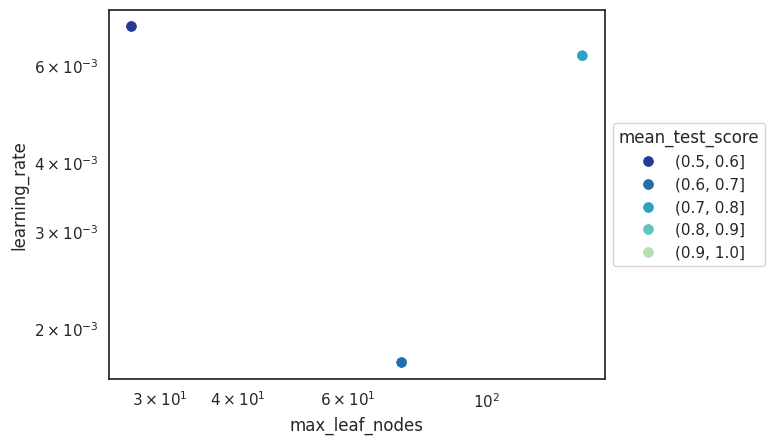

In [353]:
import seaborn as sns
import numpy as np

df = pd.DataFrame(
    {
        "max_leaf_nodes": cv_results["max_leaf_nodes"],
        "learning_rate": cv_results["learning_rate"],
        "score_bin": pd.cut(
            cv_results["mean_test_score"], bins=np.linspace(0.5, 1.0, 6)
        ),
    }
)
sns.set_palette("YlGnBu_r")
ax = sns.scatterplot(
    data=df,
    x="max_leaf_nodes",
    y="learning_rate",
    hue="score_bin",
    s=50,
    color="k",
    edgecolor=None,
)
ax.set_xscale("log")
ax.set_yscale("log")

_ = ax.legend(
    title="mean_test_score", loc="center left", bbox_to_anchor=(1, 0.5)
)

In [354]:
import numpy as np
import plotly.express as px

# Rest of your code
log10_func = np.vectorize(np.log10)
log2_func = np.vectorize(np.log2)

fig = px.parallel_coordinates(
    cv_results.rename(shorten_param, axis=1).apply({
        "learning_rate": log10_func,
        "max_leaf_nodes": log2_func,
        "min_samples_leaf": log2_func,
        "max_bins": log10_func,
        "l2_regularization": log10_func,
        "mean_test_score": lambda x: x,
    }),
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
)
fig.show()

In [355]:
# Deriving Predictions

predictions = Test.copy()
predictions["customer_category"] = model_random_search.predict(Test)

predictions.to_csv("Predictions.csv", index=False)

# End Notes
This was a fun project, great hands on experience with data analysis and machine learning.
I'll soon be writing a blog post on this, I'll link it here when it's done.
I tend to start too many things and end up completeing only a few, a lot of things get dragged on for months, but I'm glad I completed this one.
Also this was initially supposed to be a dashboarding task, will get a dashboard ready for this as well, might be great to embed it in the blog post, and on my website.

Take a look at my [website](https://costheta.tech/)

also, a huge thanks to INRIA for their [MOOC](https://inria.github.io/scikit-learn-mooc/) on scikit learn, it was a great help, I've been looking for a solution of a similar problem but I didn't have any luck finding it on kaggle, so welp, feels great to come up with my own solution.

Thanks for reading, hope you enjoyed it, feel free to leave any feedback, I'm always looking to improve.

# References
- [Scikit Learn MOOC](https://inria.github.io/scikit-learn-mooc/)
- [Australian Bureau of Statistics](https://www.abs.gov.au/statistics)
- [Australian Postcodes](https://www.matthewproctor.com/australian_postcodes)
- [Scikit Learn](https://scikit-learn.org/stable/)
- [Geopandas](https://geopandas.org/)
- [Plotly](https://plotly.com/)
- [Seaborn](https://seaborn.pydata.org/)
- [Pandas](https://pandas.pydata.org/)
- [Numpy](https://numpy.org/)
- [Matplotlib](https://matplotlib.org/)
- [Folium](https://python-visualization.github.io/folium/)
- [Geopy](https://geopy.readthedocs.io/en/stable/)
- [Scipy](https://www.scipy.org/)
- [Shapely](https://shapely.readthedocs.io/en/stable/)